In [1]:
from algorithm.utils.data.tf.dataimage import DataImage
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
tf.get_logger().setLevel('WARNING')
import keras
%load_ext tensorboard

In [2]:
normalize = True
mean = 'auto' # 'auto' -> mean_value = [float(1/255), float(1/255), float(1/255)]
mean_value = [float(1/255), float(1/255), float(1/255)]

In [3]:
dataset = DataImage(data_path="../Input/dataset", split=0.2, resize=True, height='auto', width='auto', normalize=normalize, mean=mean, name="Electronic components dataset", batch_size=16)

In [4]:
dataset

Electronic components dataset
	Number of points: 2884
	Root location: ../Input/dataset
	Split: 0.2
	Transform used:	Resize(size=(128, 128)
	Normalize(mean=[0.00392156862745098, 0.00392156862745098, 0.00392156862745098], std=None)


In [5]:
validset = dataset.get_set(split="validation")

In [6]:
# get some random training images
dataiter = iter(validset)
images, labels = next(dataiter)

In [7]:
images

{'data': <tf.Tensor: shape=(16, 128, 128, 3), dtype=float32, numpy=
 array([[[[0.72976124, 0.8191914 , 0.7489861 ],
          [0.68000734, 0.7694375 , 0.6992322 ],
          [0.6370113 , 0.72644144, 0.6562362 ],
          ...,
          [0.9979775 , 0.99391806, 0.9984682 ],
          [0.99770224, 0.99646145, 0.9984682 ],
          [0.9969363 , 1.        , 0.9984682 ]],
 
         [[0.49992344, 0.5525276 , 0.49485296],
          [0.41490552, 0.4675097 , 0.40983507],
          [0.33934927, 0.39195344, 0.3342788 ],
          ...,
          [0.8102621 , 0.87236094, 0.8269259 ],
          [0.79017603, 0.8506233 , 0.8051883 ],
          [0.77741706, 0.8355666 , 0.7912804 ]],
 
         [[0.2013289 , 0.25595513, 0.19722351],
          [0.16840726, 0.22303349, 0.16430186],
          [0.15165682, 0.20628305, 0.14755142],
          ...,
          [0.46332294, 0.47663242, 0.43231562],
          [0.4294089 , 0.43181682, 0.39031866],
          [0.39790234, 0.39563614, 0.35162523]],
 
         ...,


In [8]:
labels

<tf.Tensor: shape=(16,), dtype=string, numpy=
array([b'Ceramic capacitor', b'Resistor', b'Resistor', b'Resistor',
       b'Not mounted', b'Resistor', b'Resistor', b'Ceramic capacitor',
       b'Rectangular pin', b'Not mounted', b'Rectangular pin',
       b'Ceramic capacitor', b'Resistor', b'Rectangular pin',
       b'Ceramic capacitor', b'Ceramic capacitor'], dtype=object)>

In [9]:
class_names = dataset.labels

In [10]:
class_names

['Ceramic capacitor',
 'Connector',
 'Diode',
 'Dip Switch',
 'Fuse',
 'IC',
 'Inductor',
 'Jumper',
 'Jumper cut',
 'LED',
 'Minimelf',
 'Not mounted',
 'Optoisolator',
 'Oscillator',
 'Pushbutton',
 'Rectangular pin',
 'Relais',
 'Resistor',
 'Resistor Network',
 'SOT',
 'TO252',
 'Tantalum capacitor']

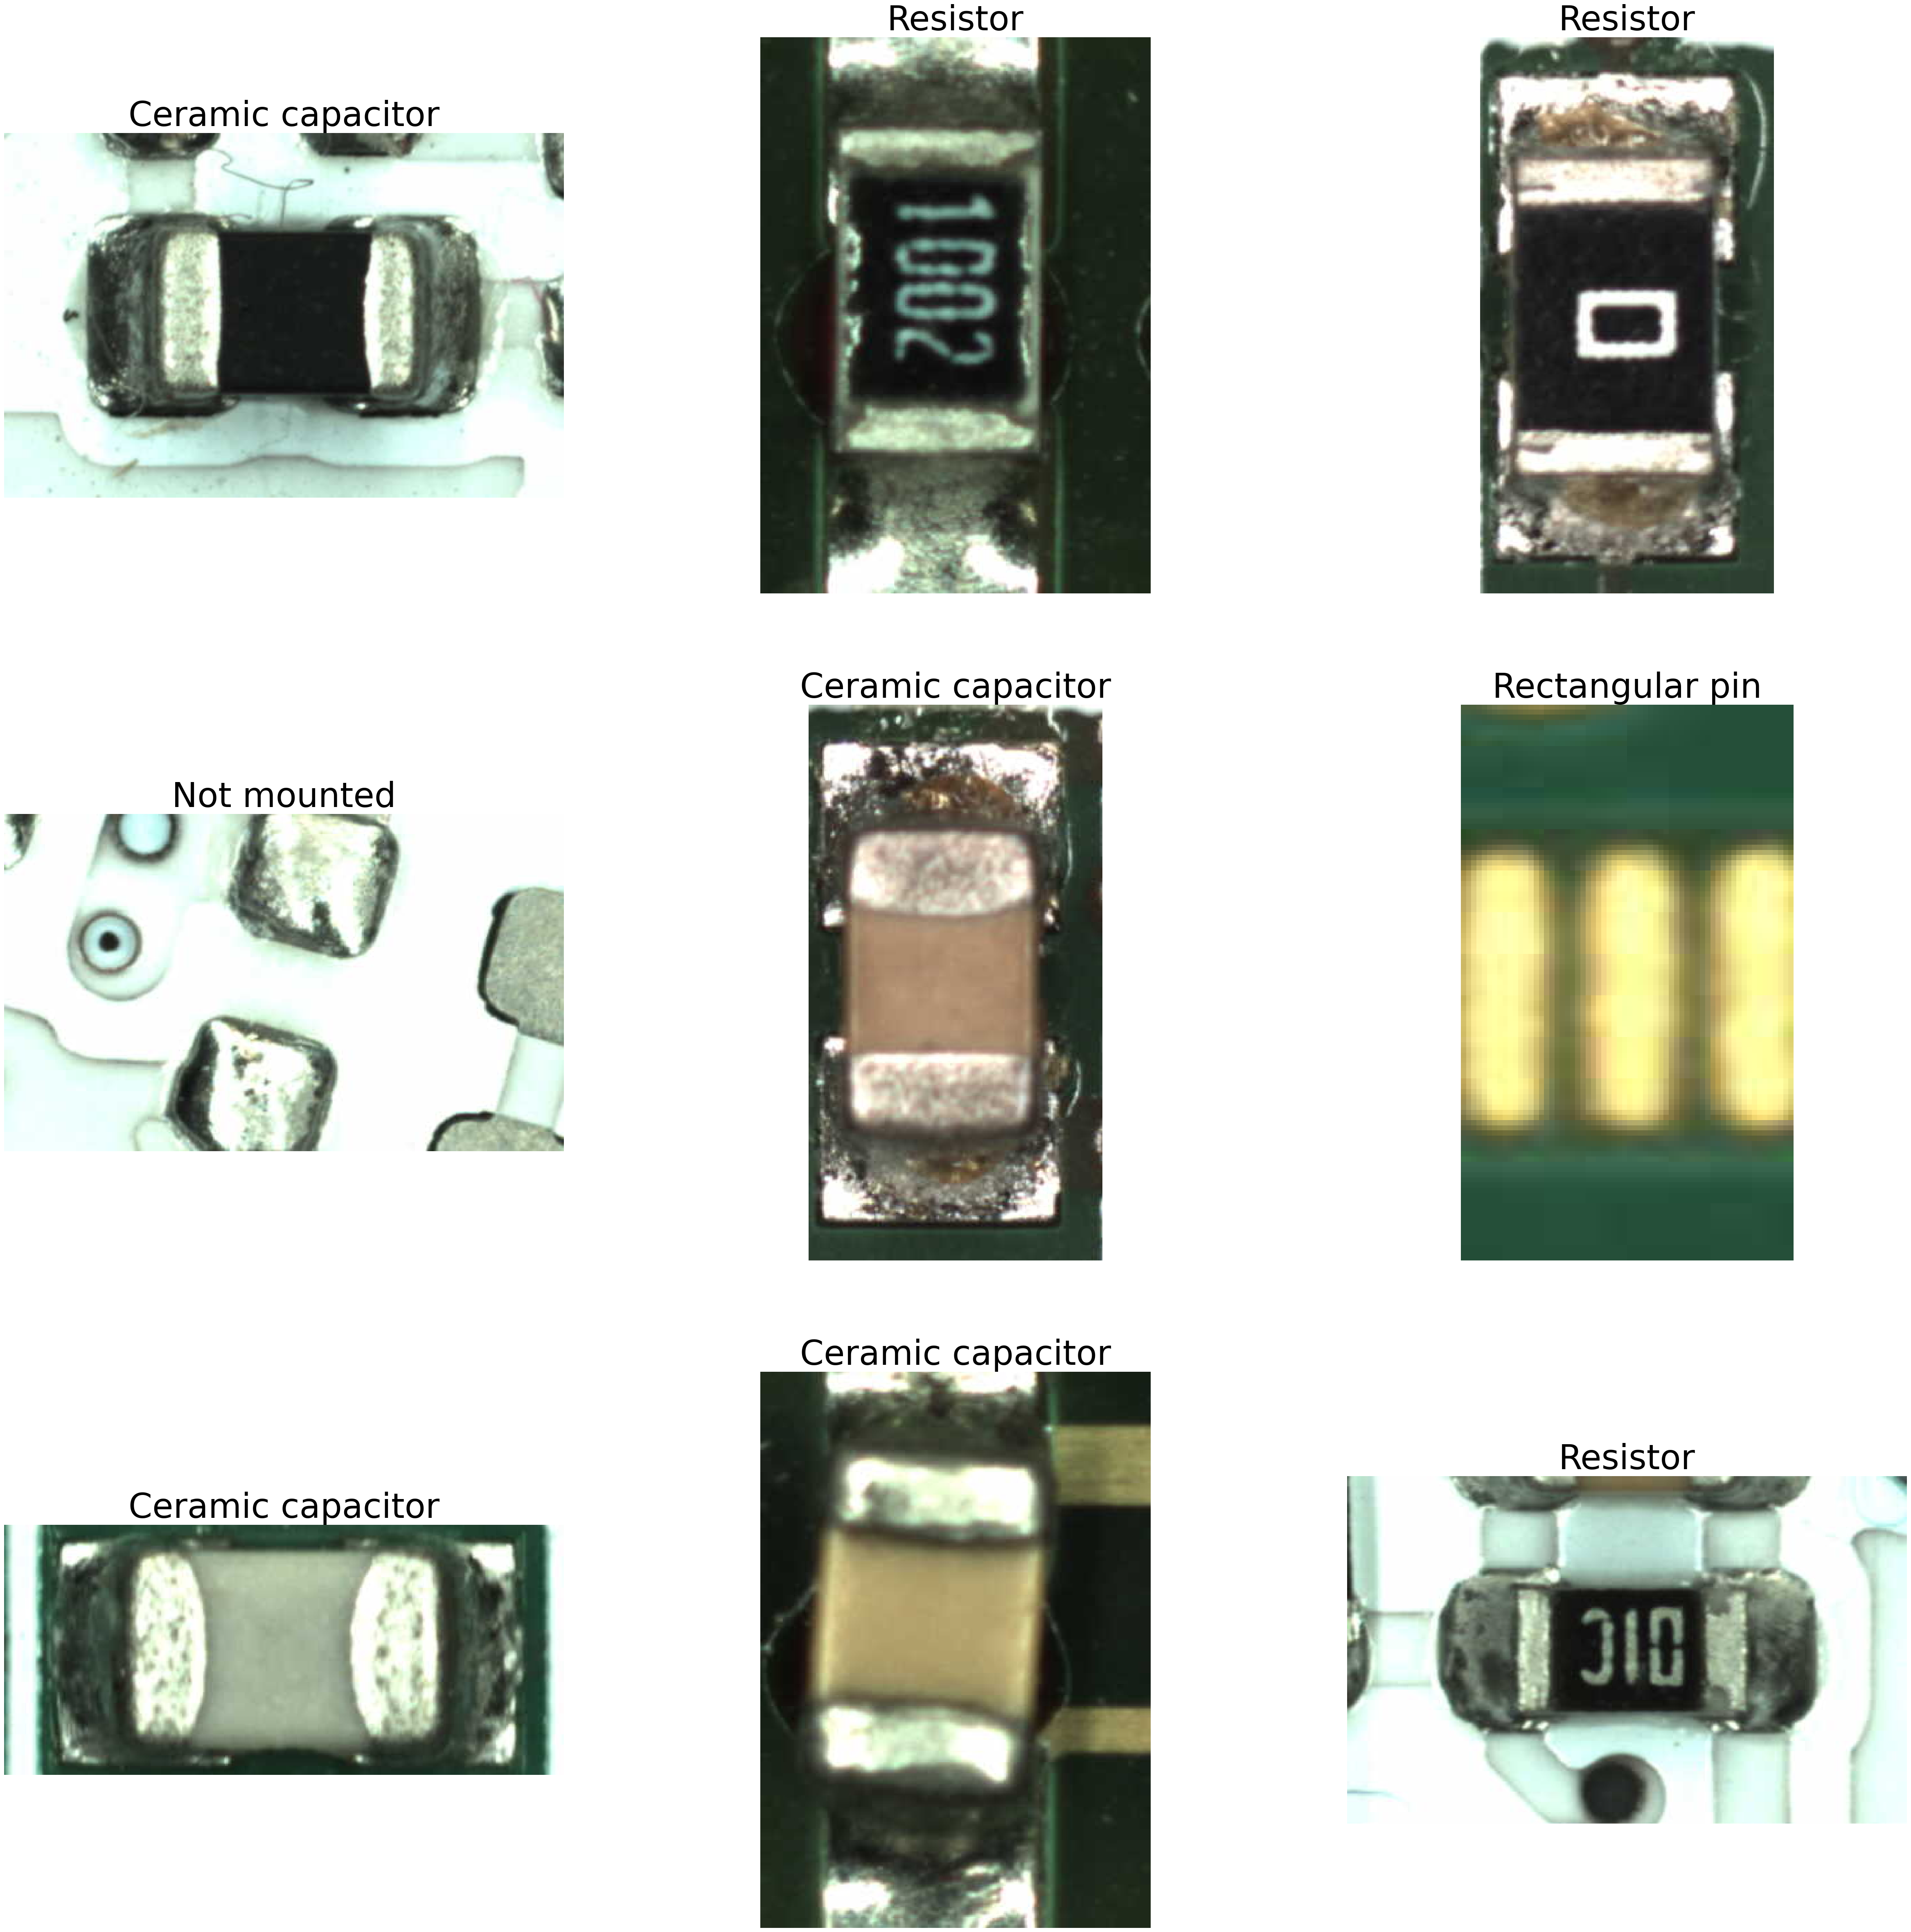

In [11]:
import matplotlib.pyplot as plt
import numpy as np
image_batch, label_batch = next(iter(validset))

plt.figure(figsize=(60, 60))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    printable_object = dataset.print_item(image_batch['print_object'][i])
    plt.imshow(printable_object)
    label = label_batch[i].numpy().decode("utf-8")
    plt.title(label, fontsize=60)
    plt.axis("off")

In [12]:
validset = dataset.apply_one_hot_encoding(validset)

In [13]:
in_dir = "../out/models/ResNet2__0_3"

In [14]:
tf.get_logger().setLevel('ERROR')
model = keras.models.load_model(in_dir)

1/1 [==============================] - 0s 23ms/step
Predicted label: LED
Real label: LED


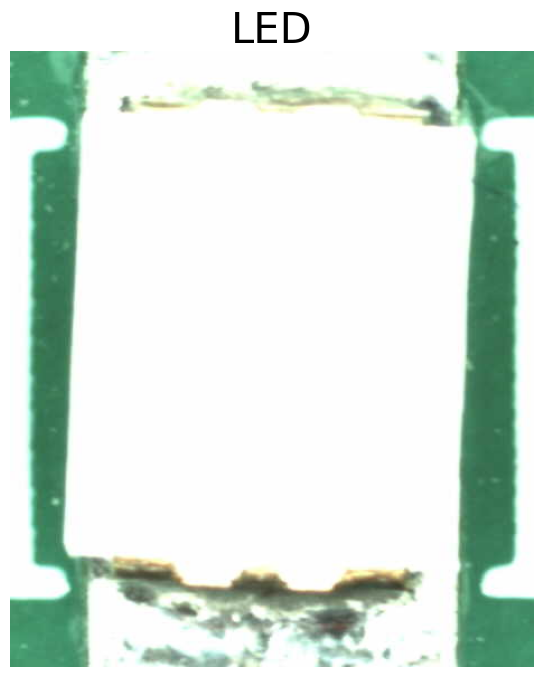

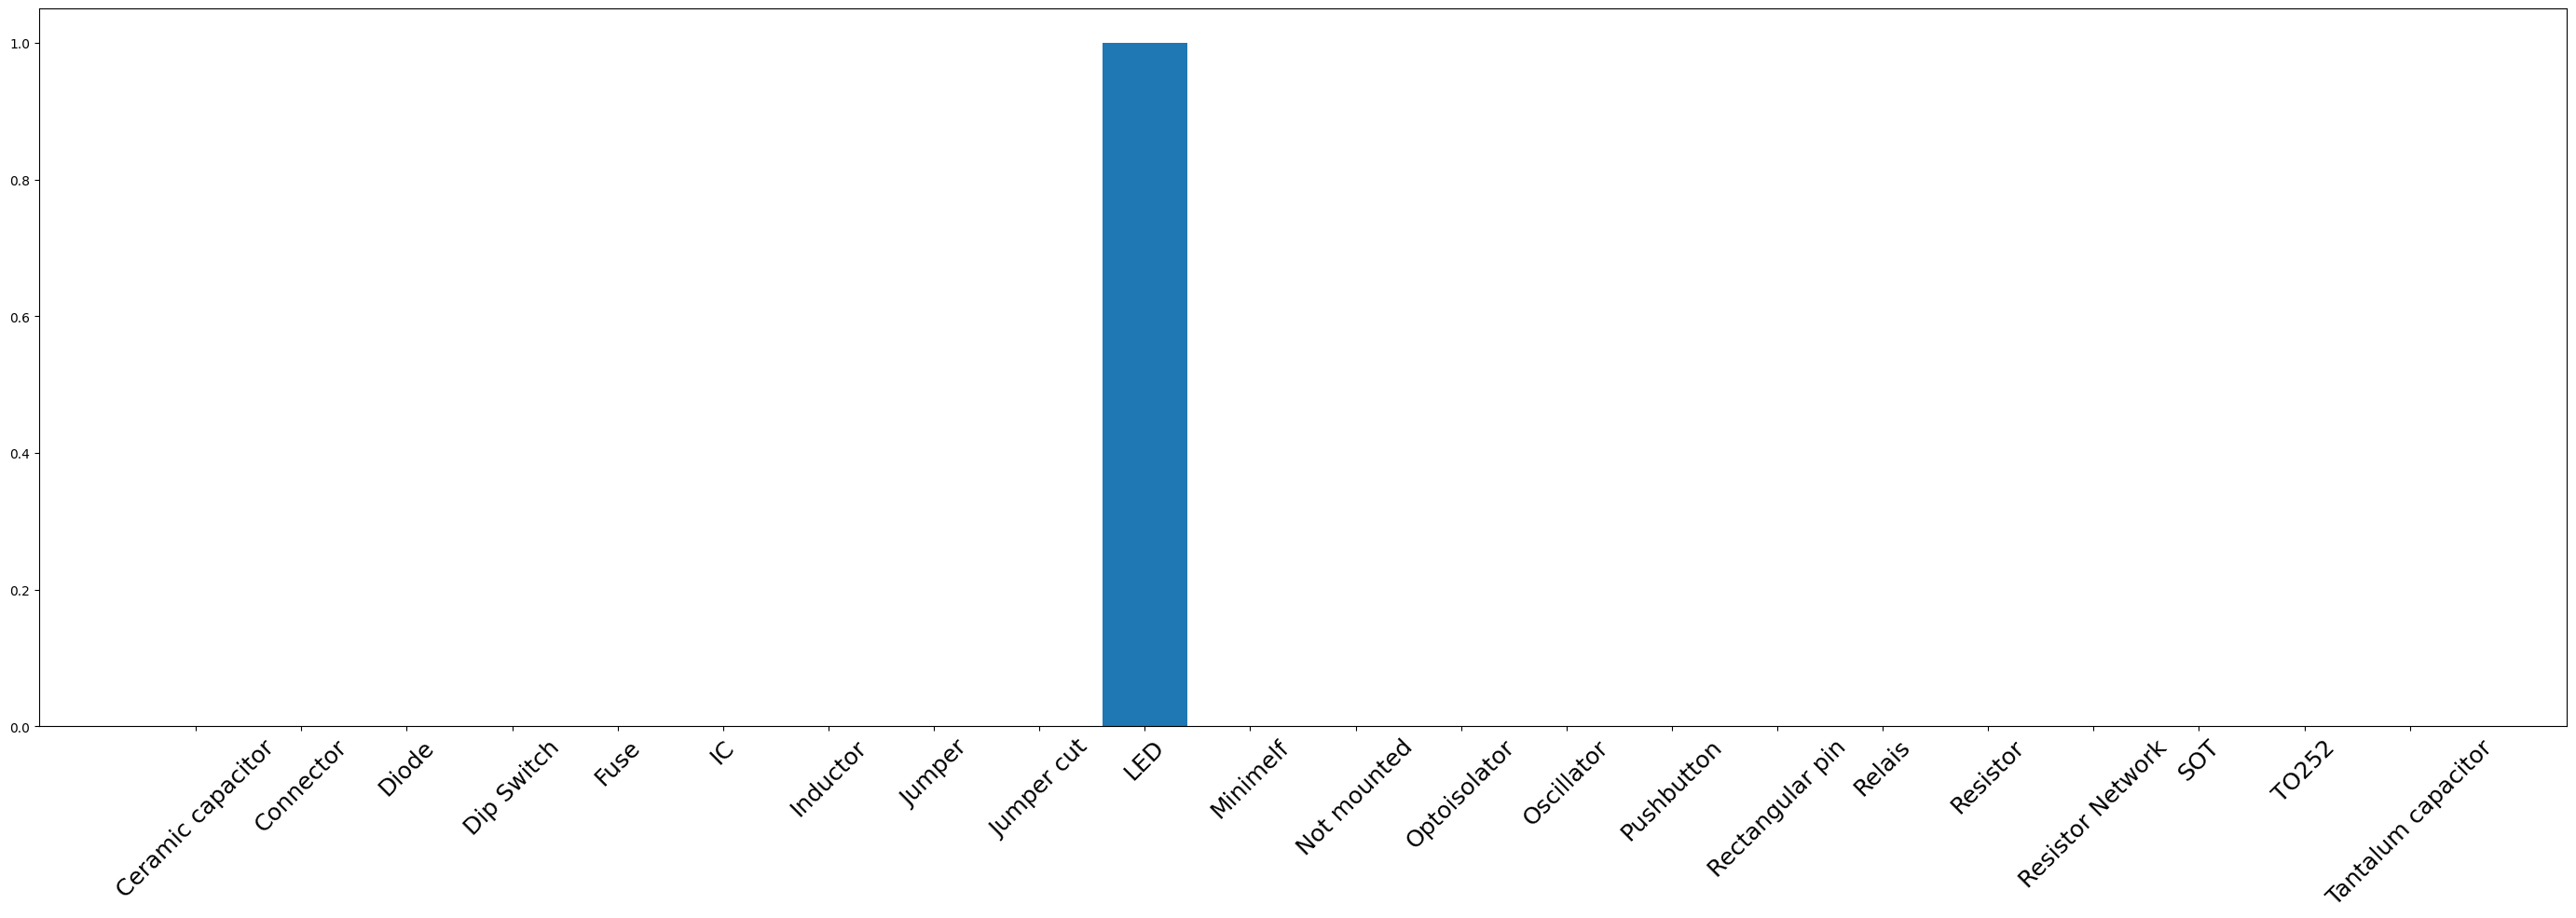

1/1 [==============================] - 0s 36ms/step
Predicted label: Not mounted
Real label: Not mounted


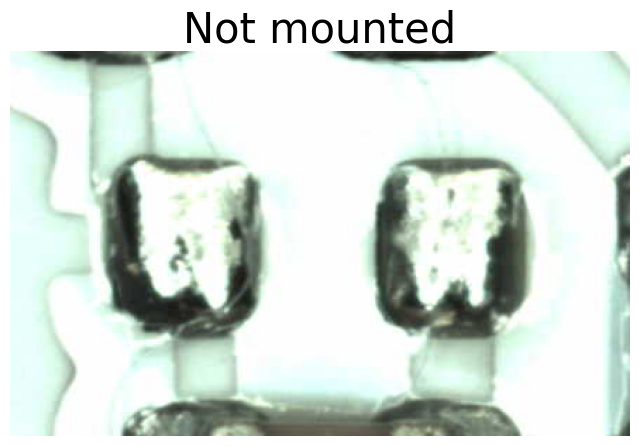

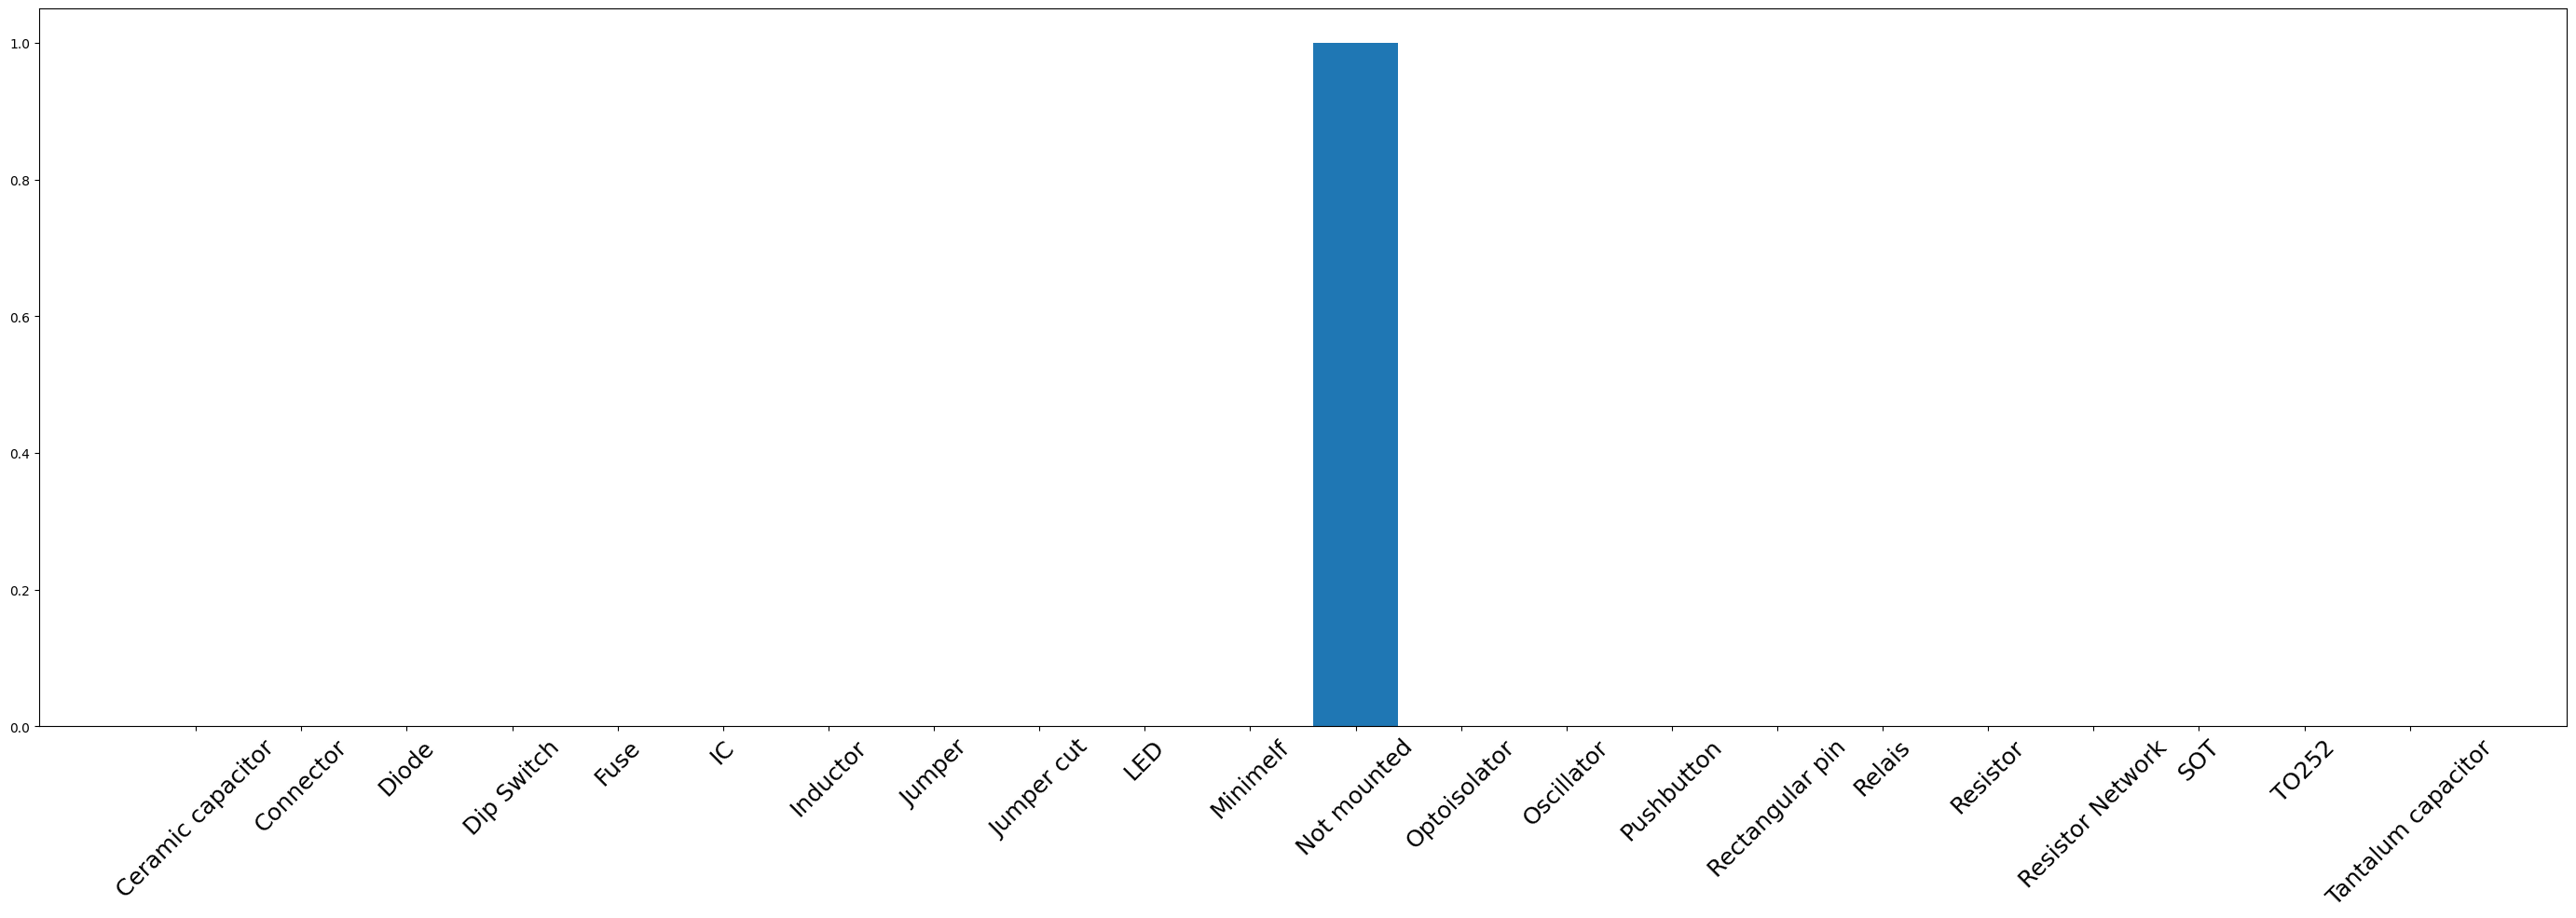

1/1 [==============================] - 0s 26ms/step
Predicted label: Jumper cut
Real label: Jumper cut


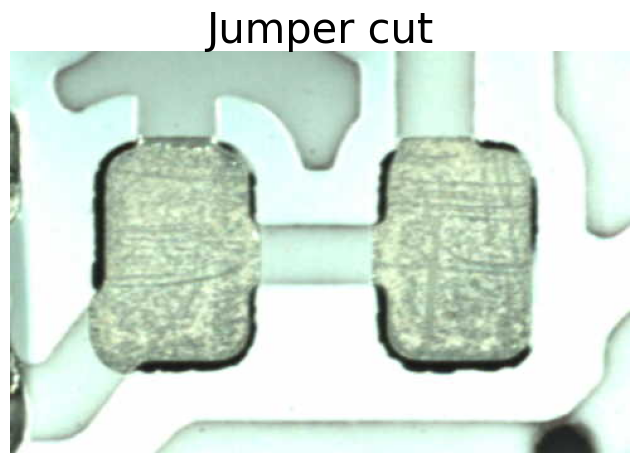

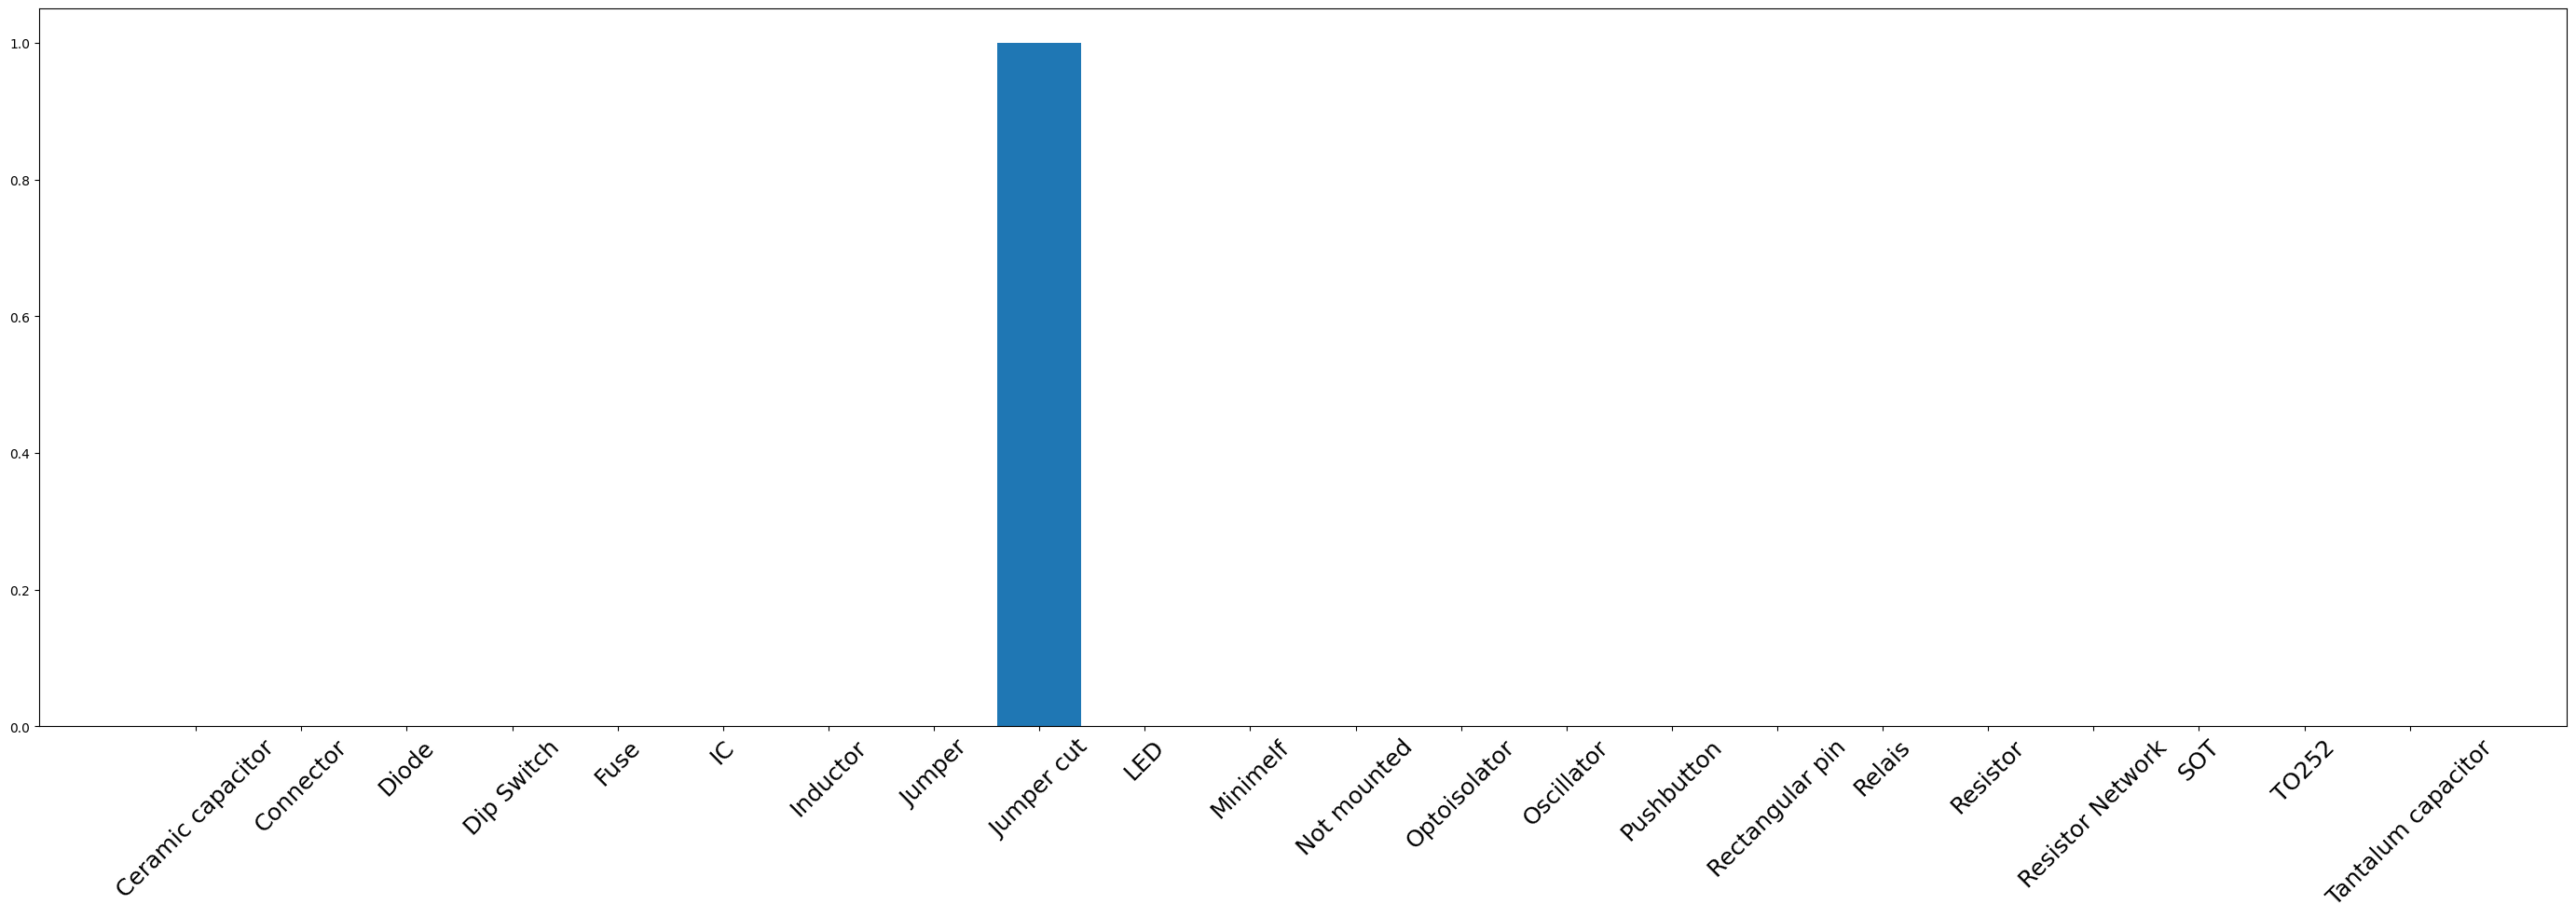

1/1 [==============================] - 0s 23ms/step
Predicted label: Resistor
Real label: Resistor


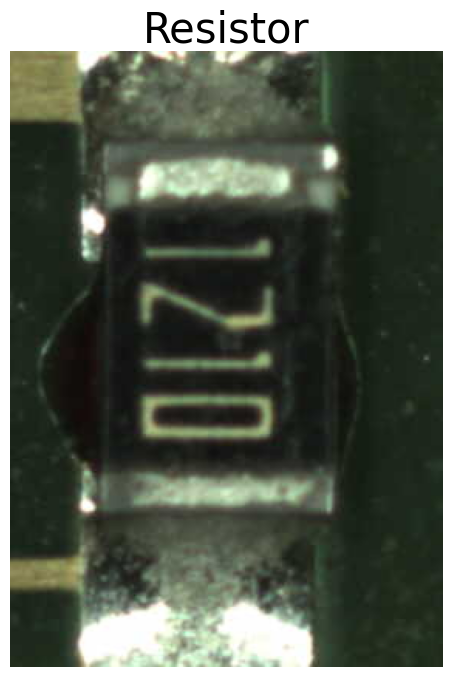

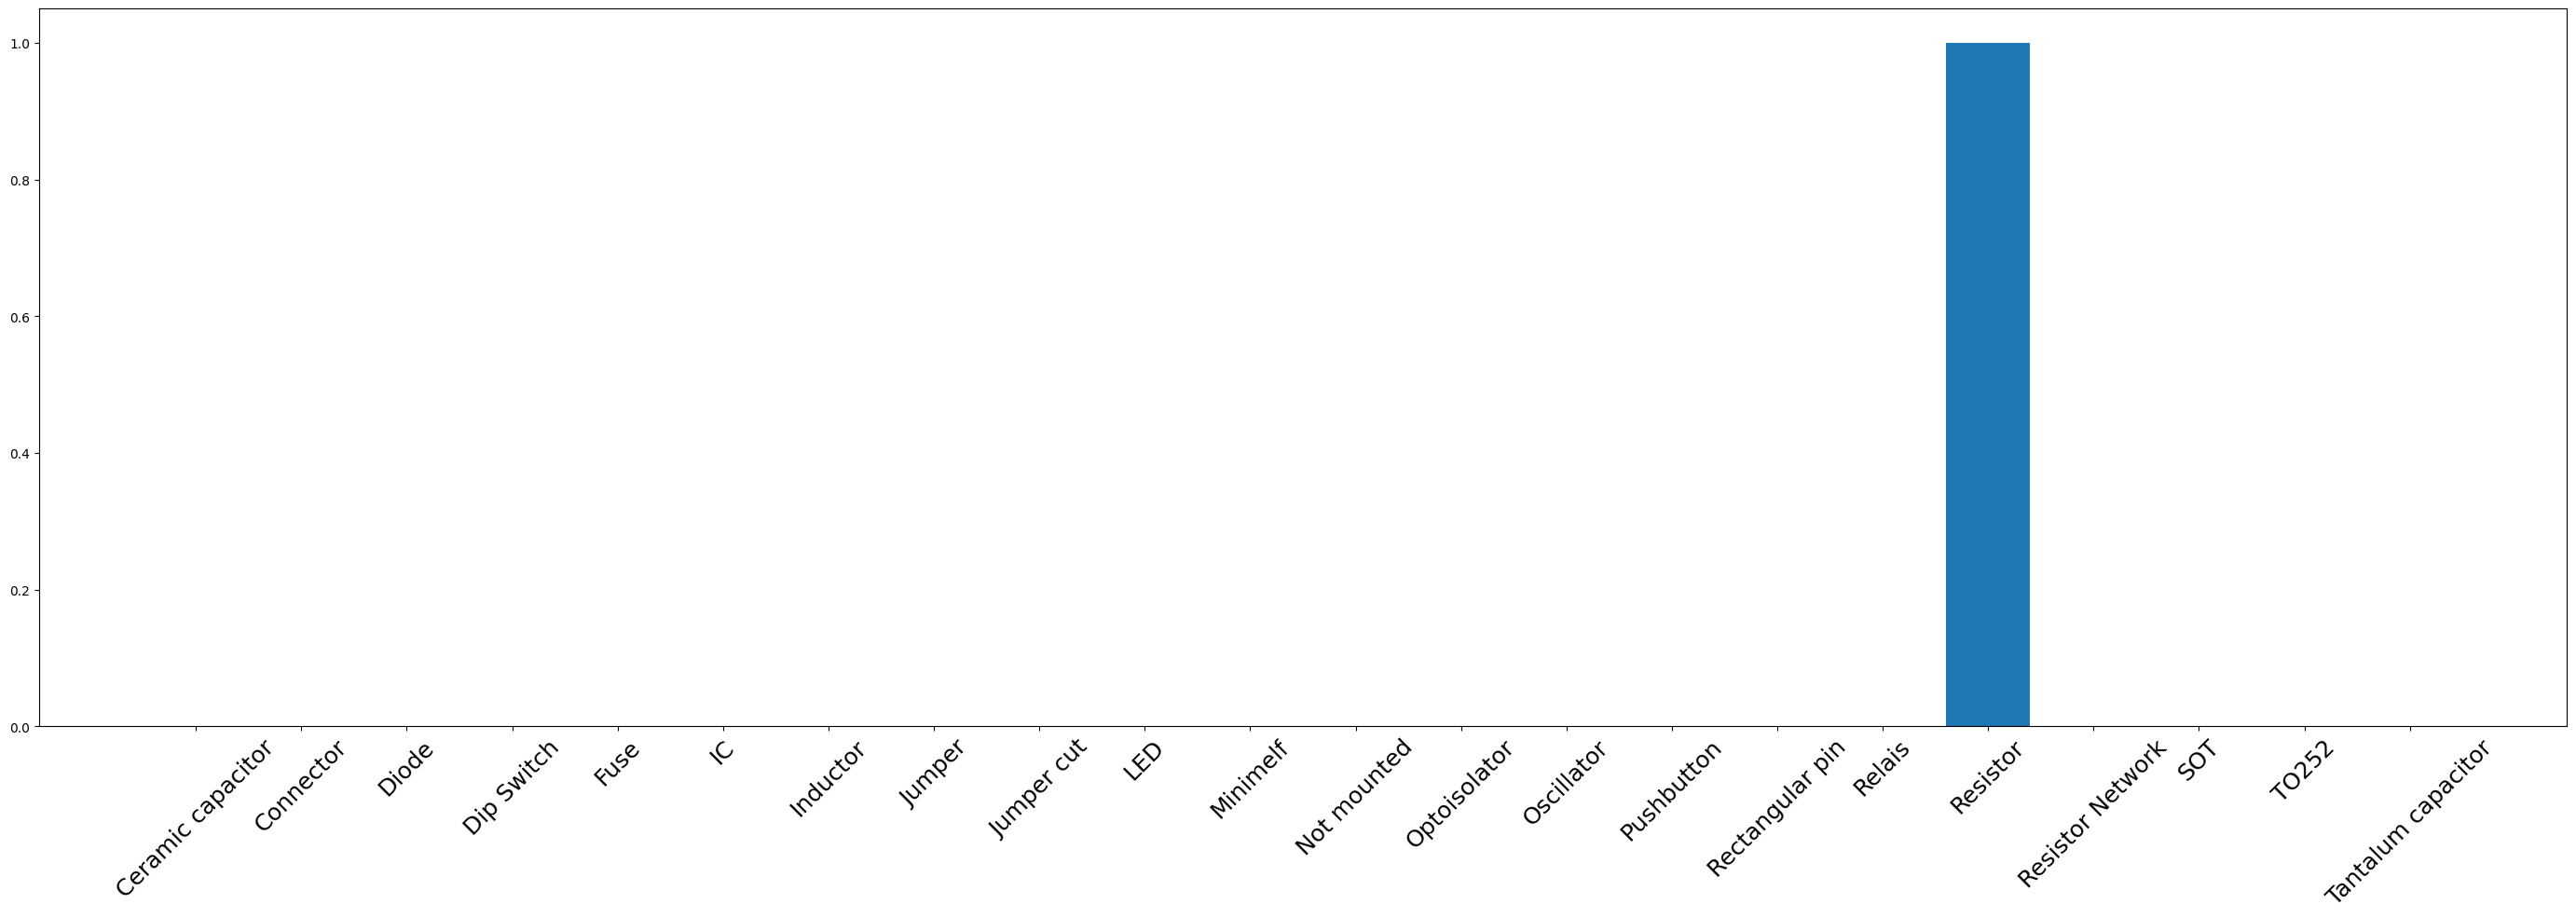

1/1 [==============================] - 0s 24ms/step
Predicted label: LED
Real label: LED


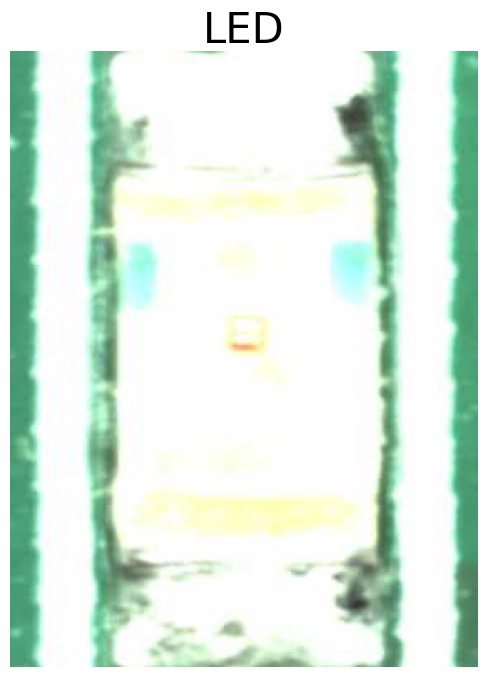

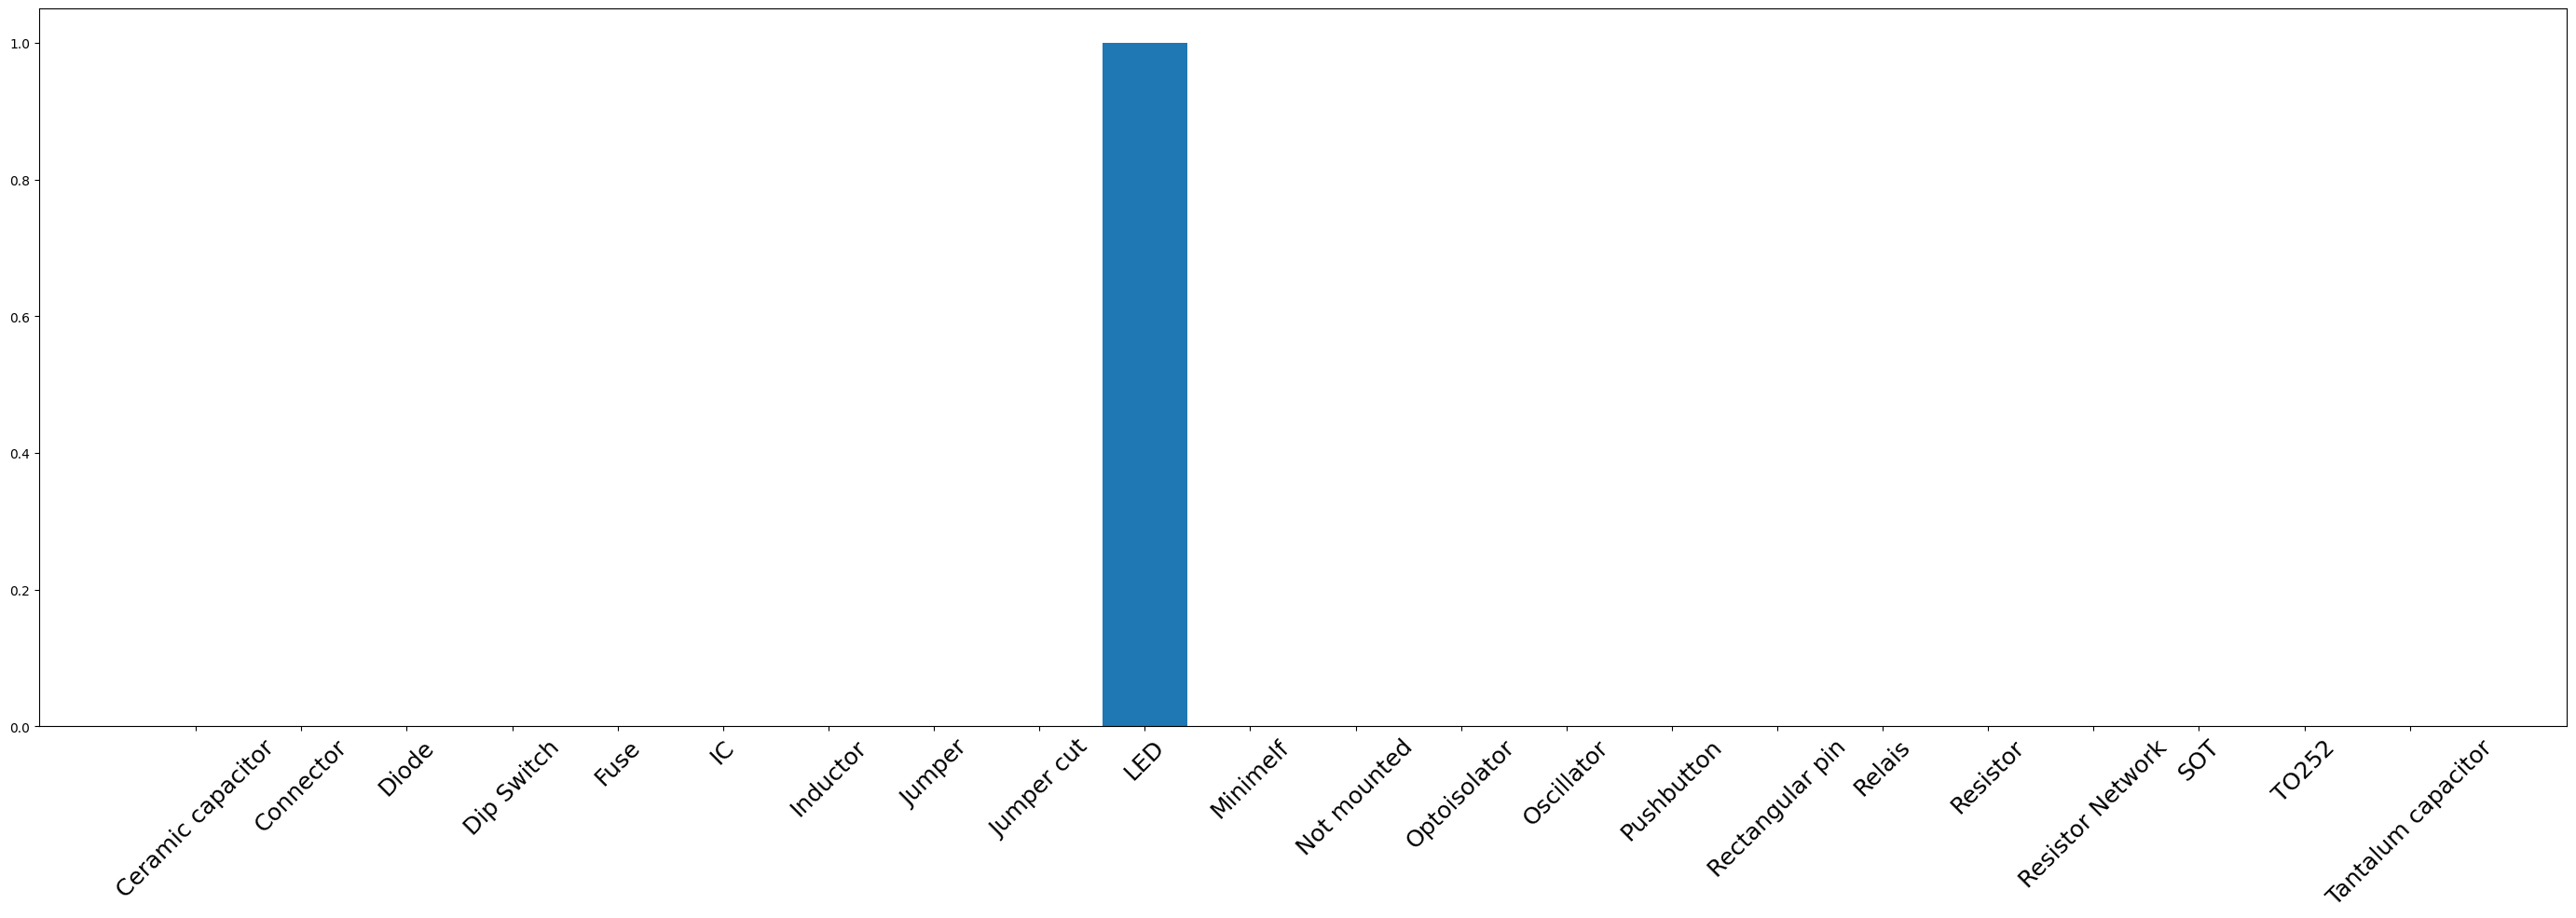

1/1 [==============================] - 0s 22ms/step
Predicted label: Resistor
Real label: Resistor


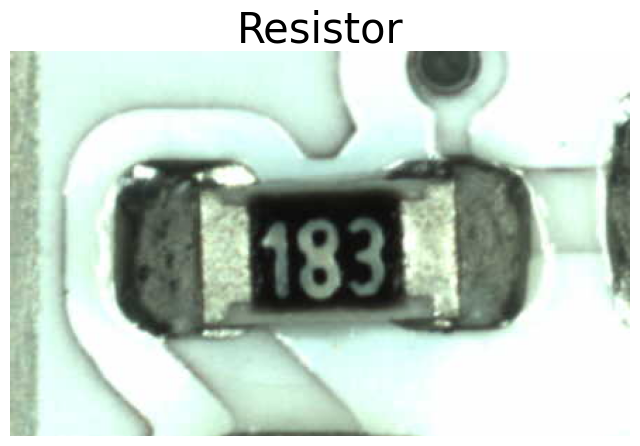

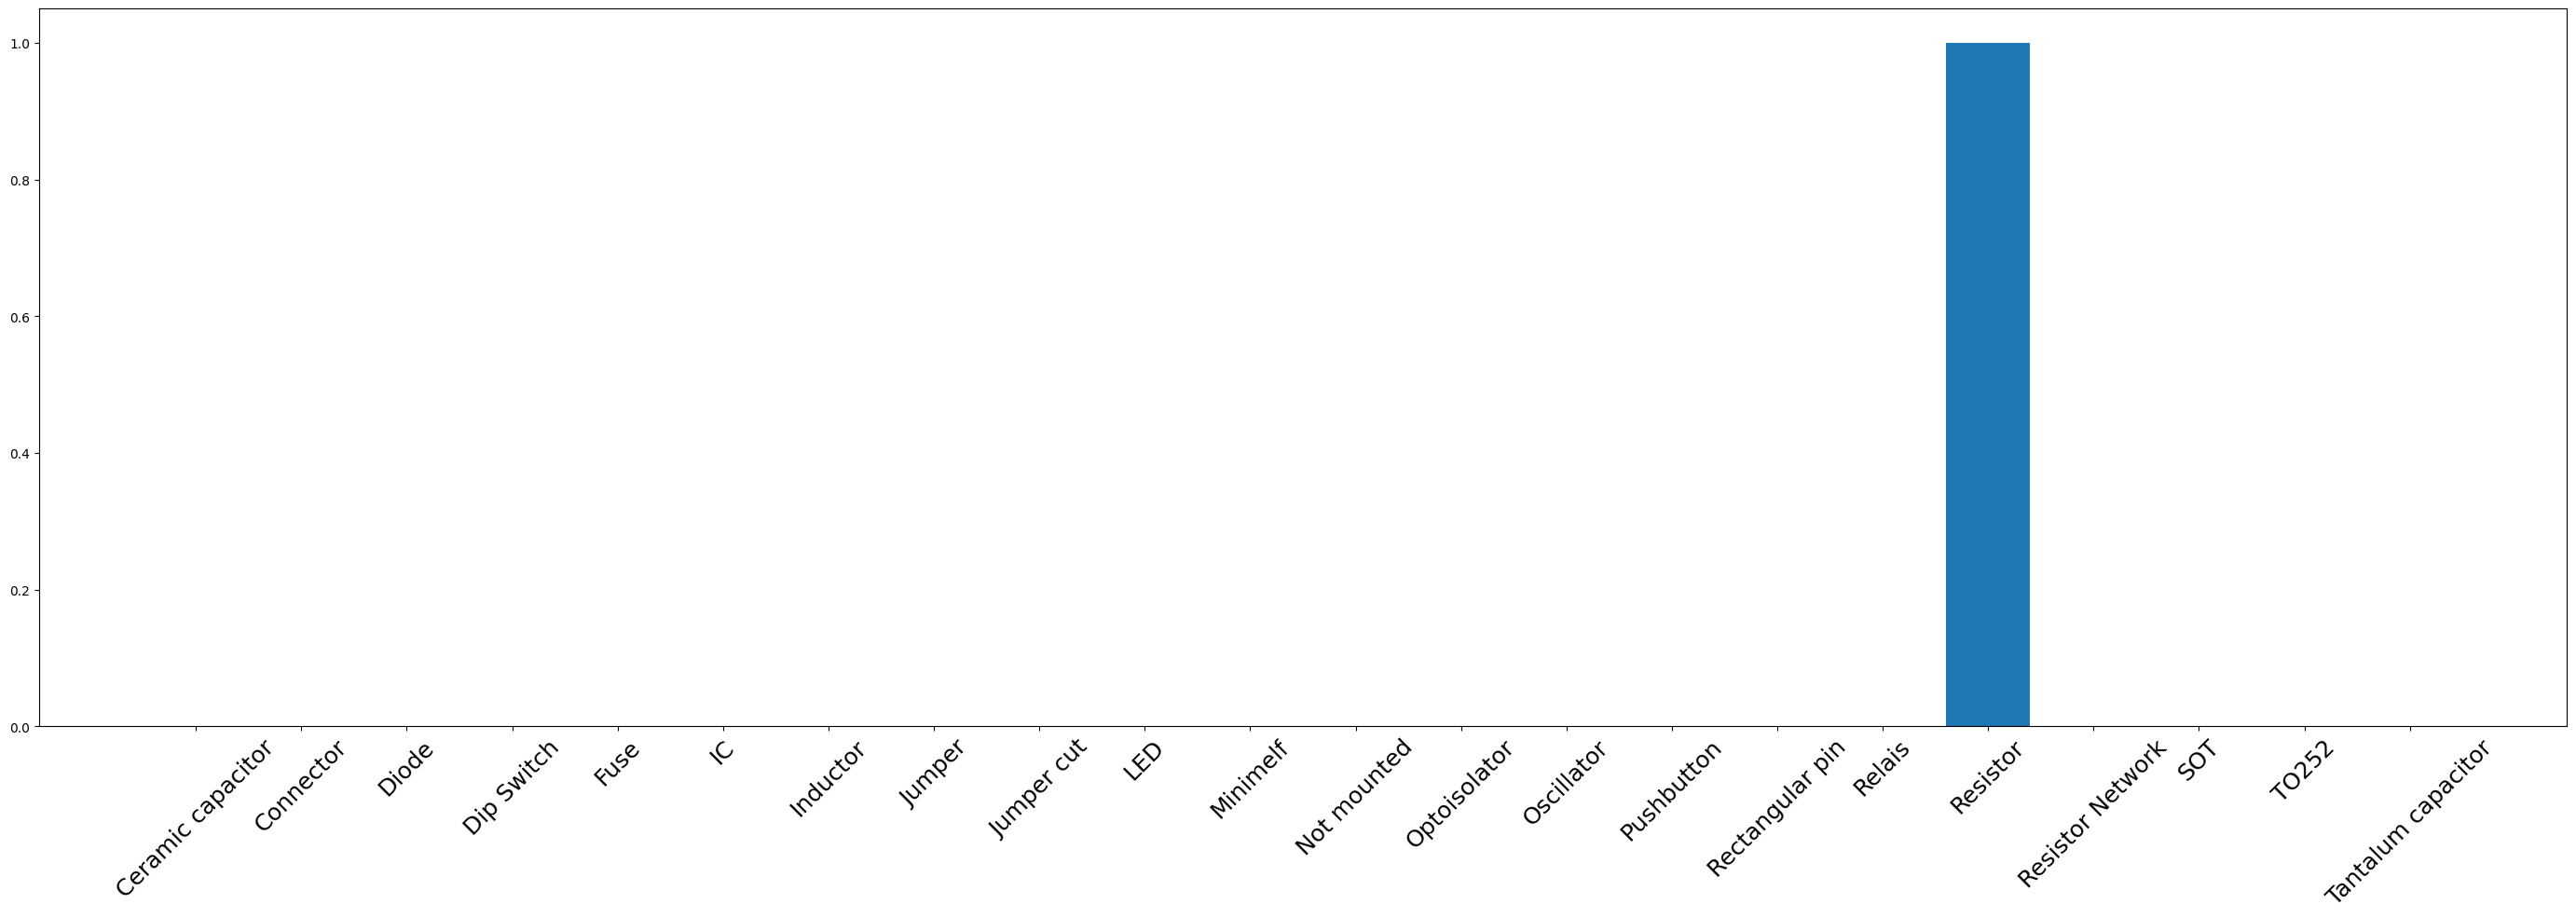

1/1 [==============================] - 0s 22ms/step
Predicted label: Not mounted
Real label: Not mounted


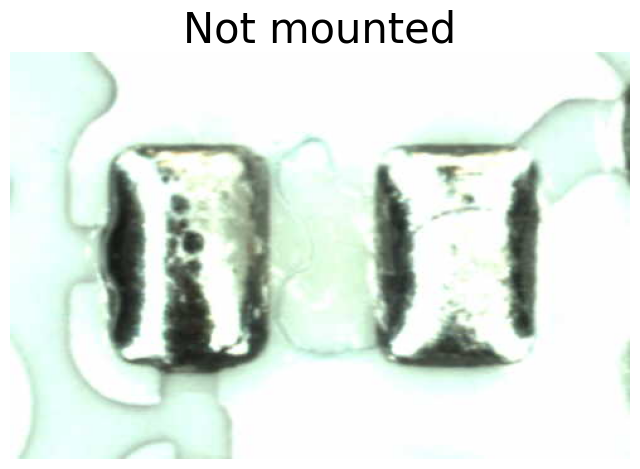

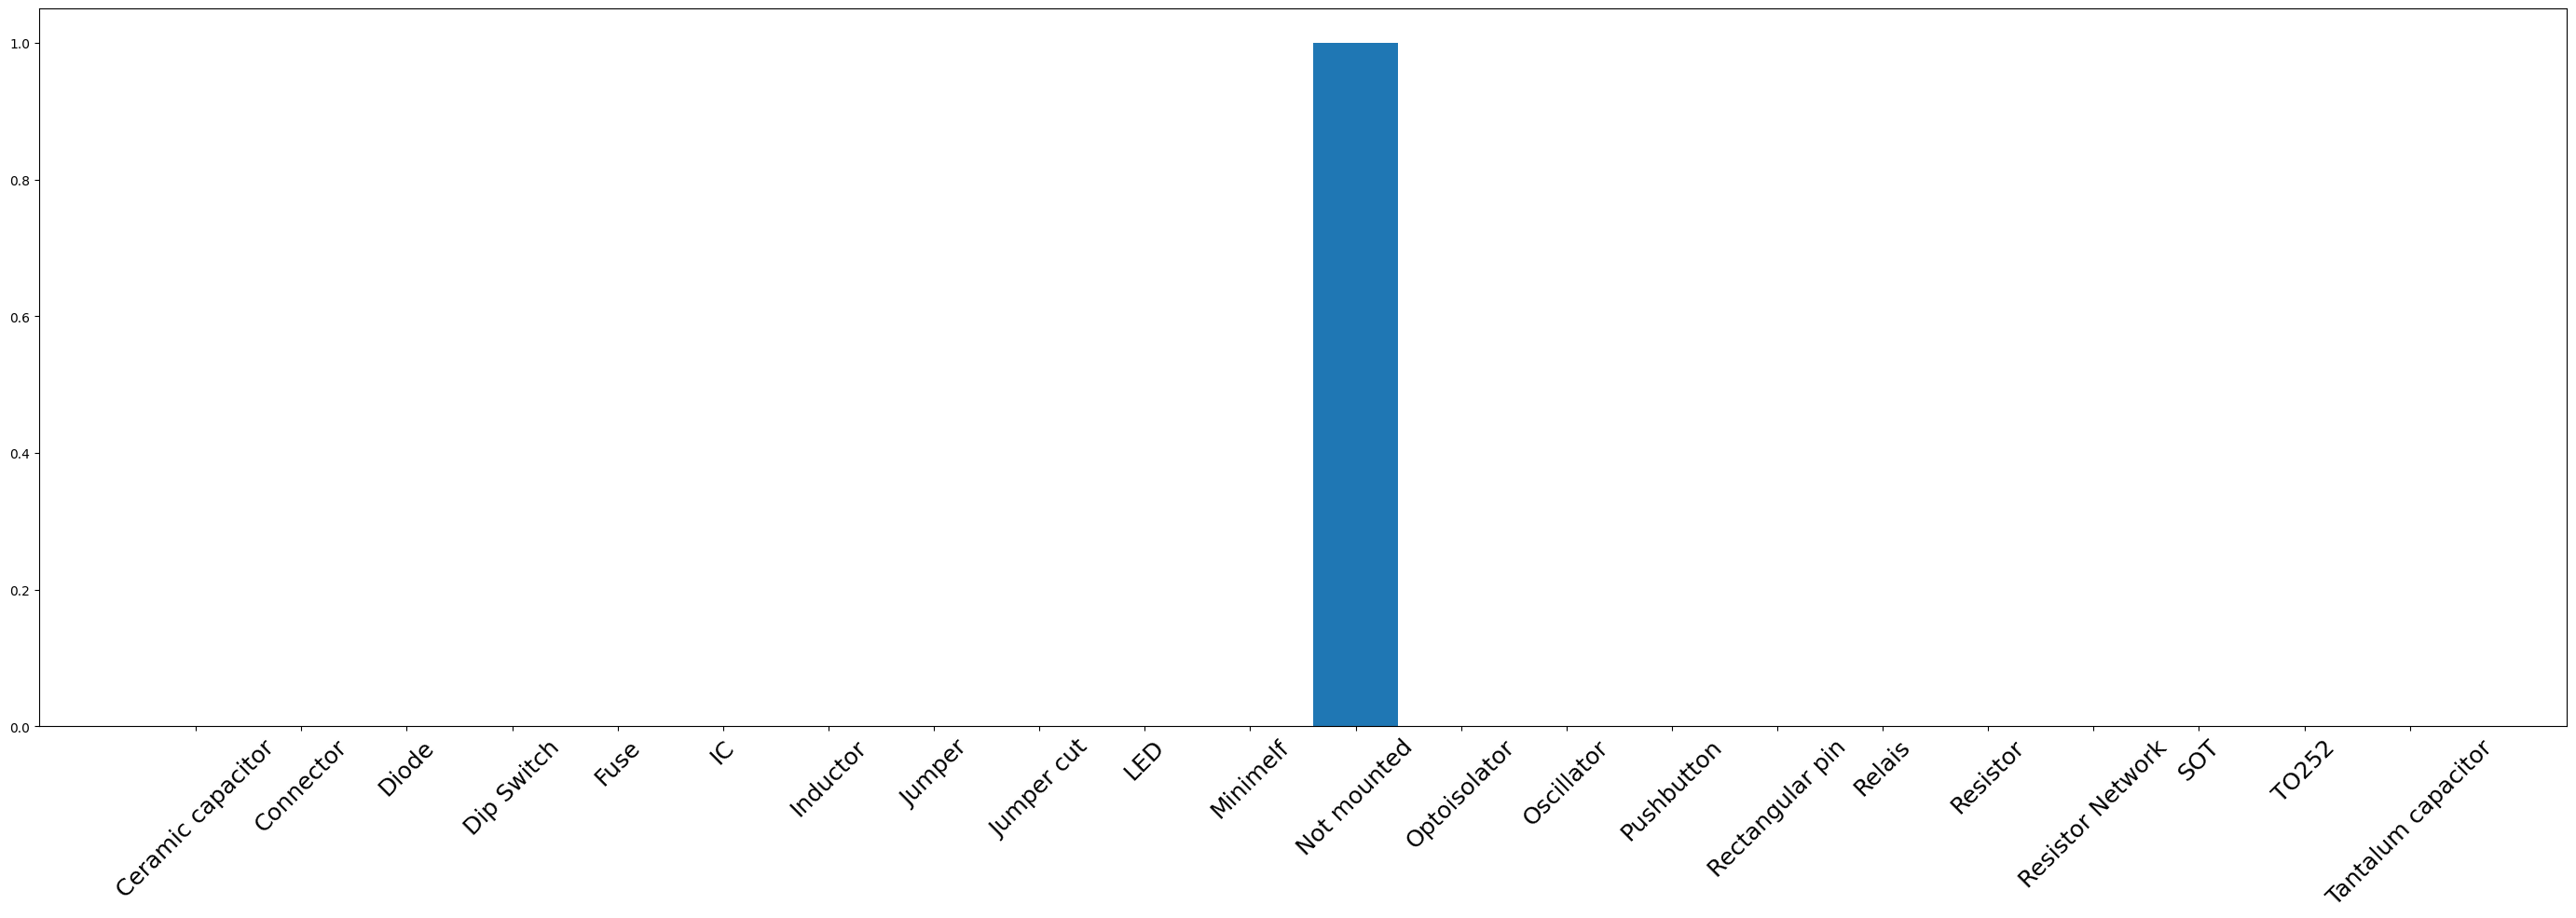

1/1 [==============================] - 0s 35ms/step
Predicted label: Resistor
Real label: Resistor


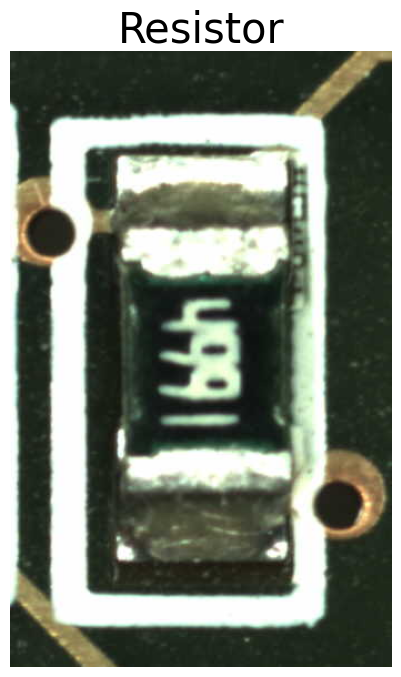

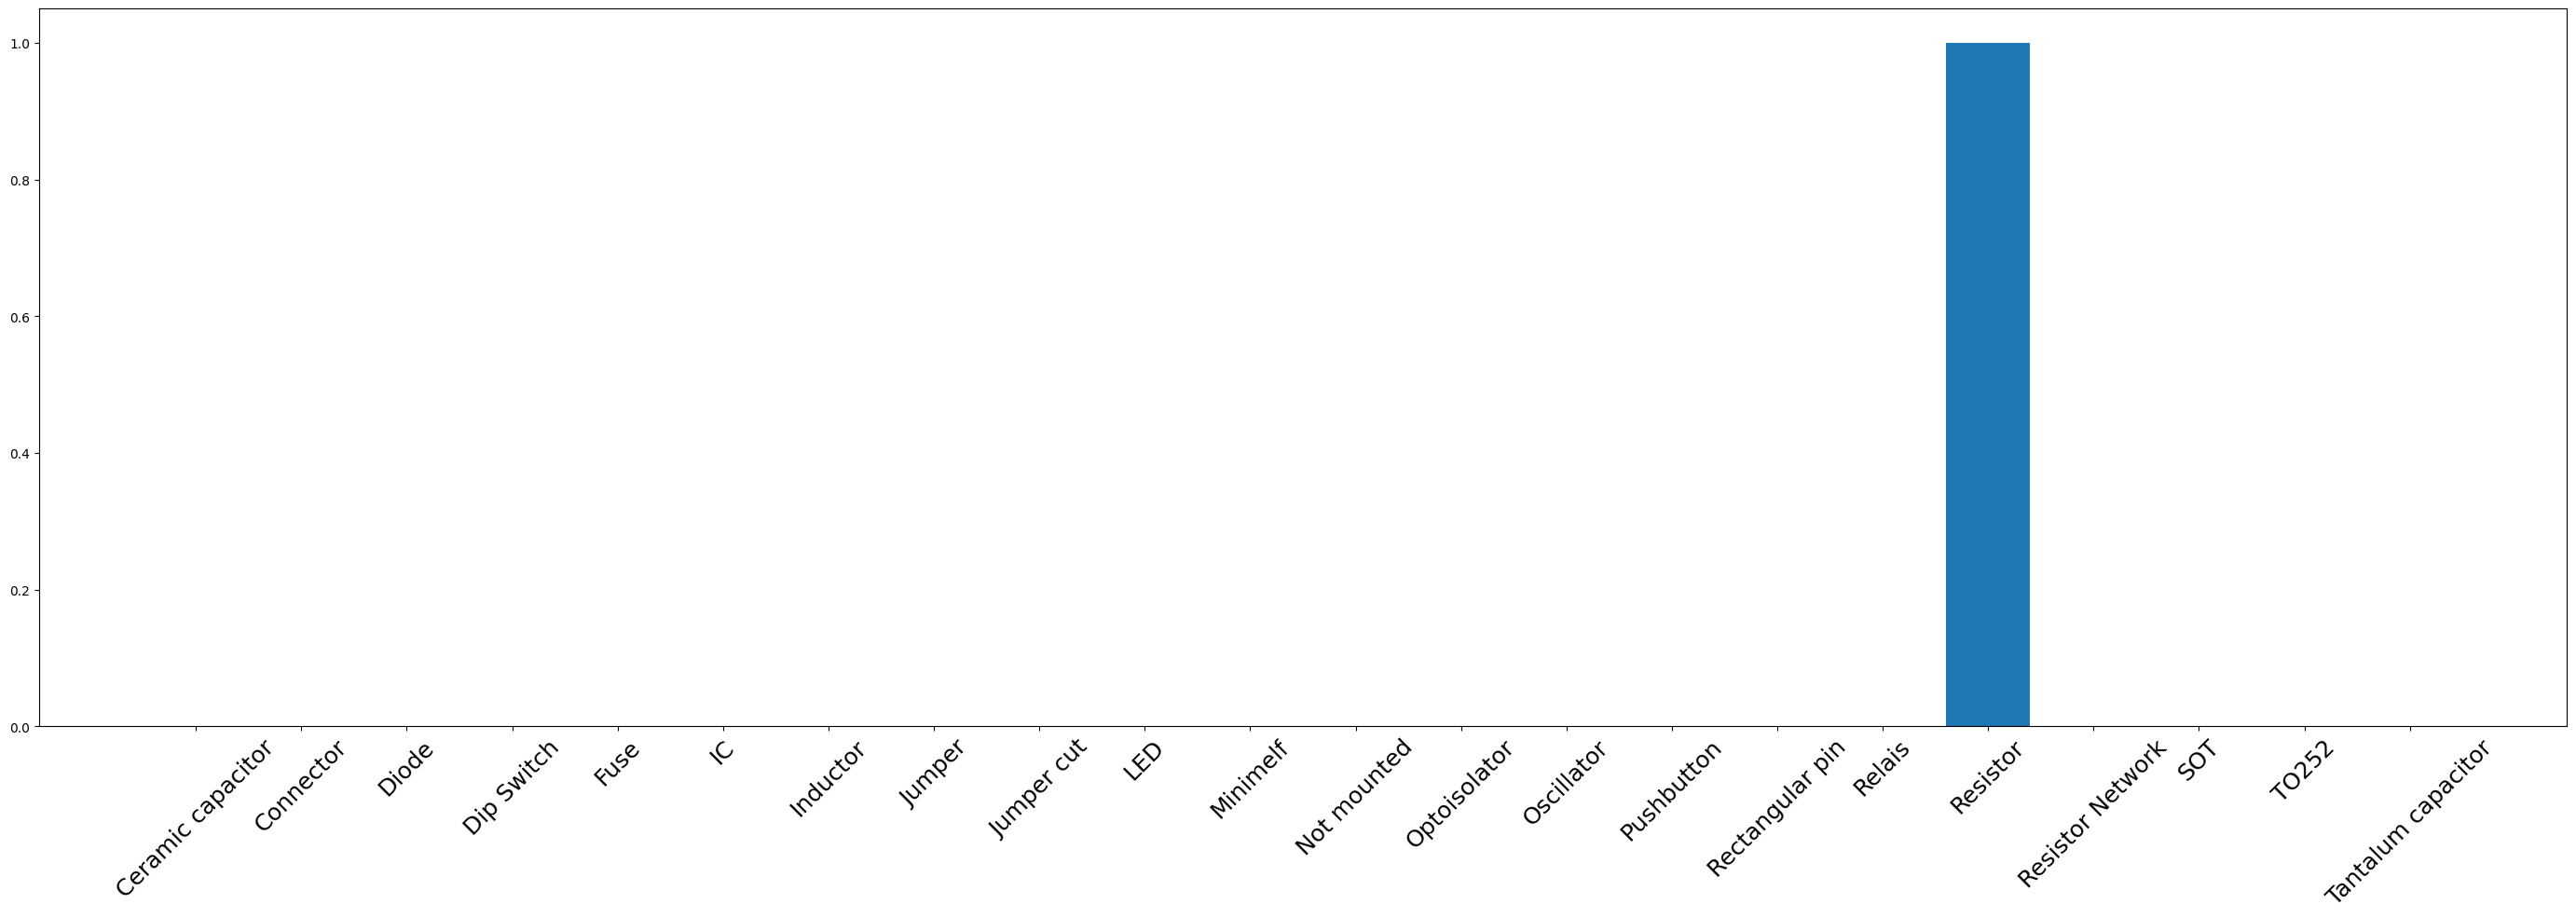

1/1 [==============================] - 0s 32ms/step
Predicted label: Rectangular pin
Real label: Rectangular pin


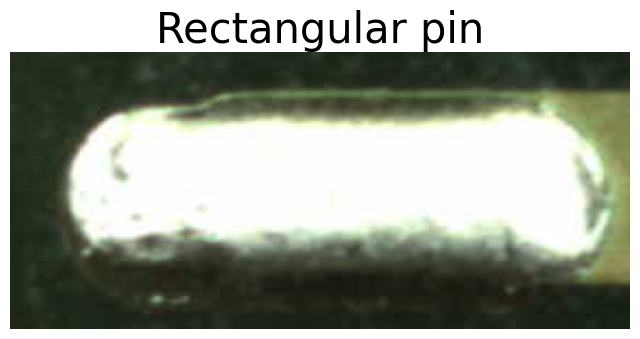

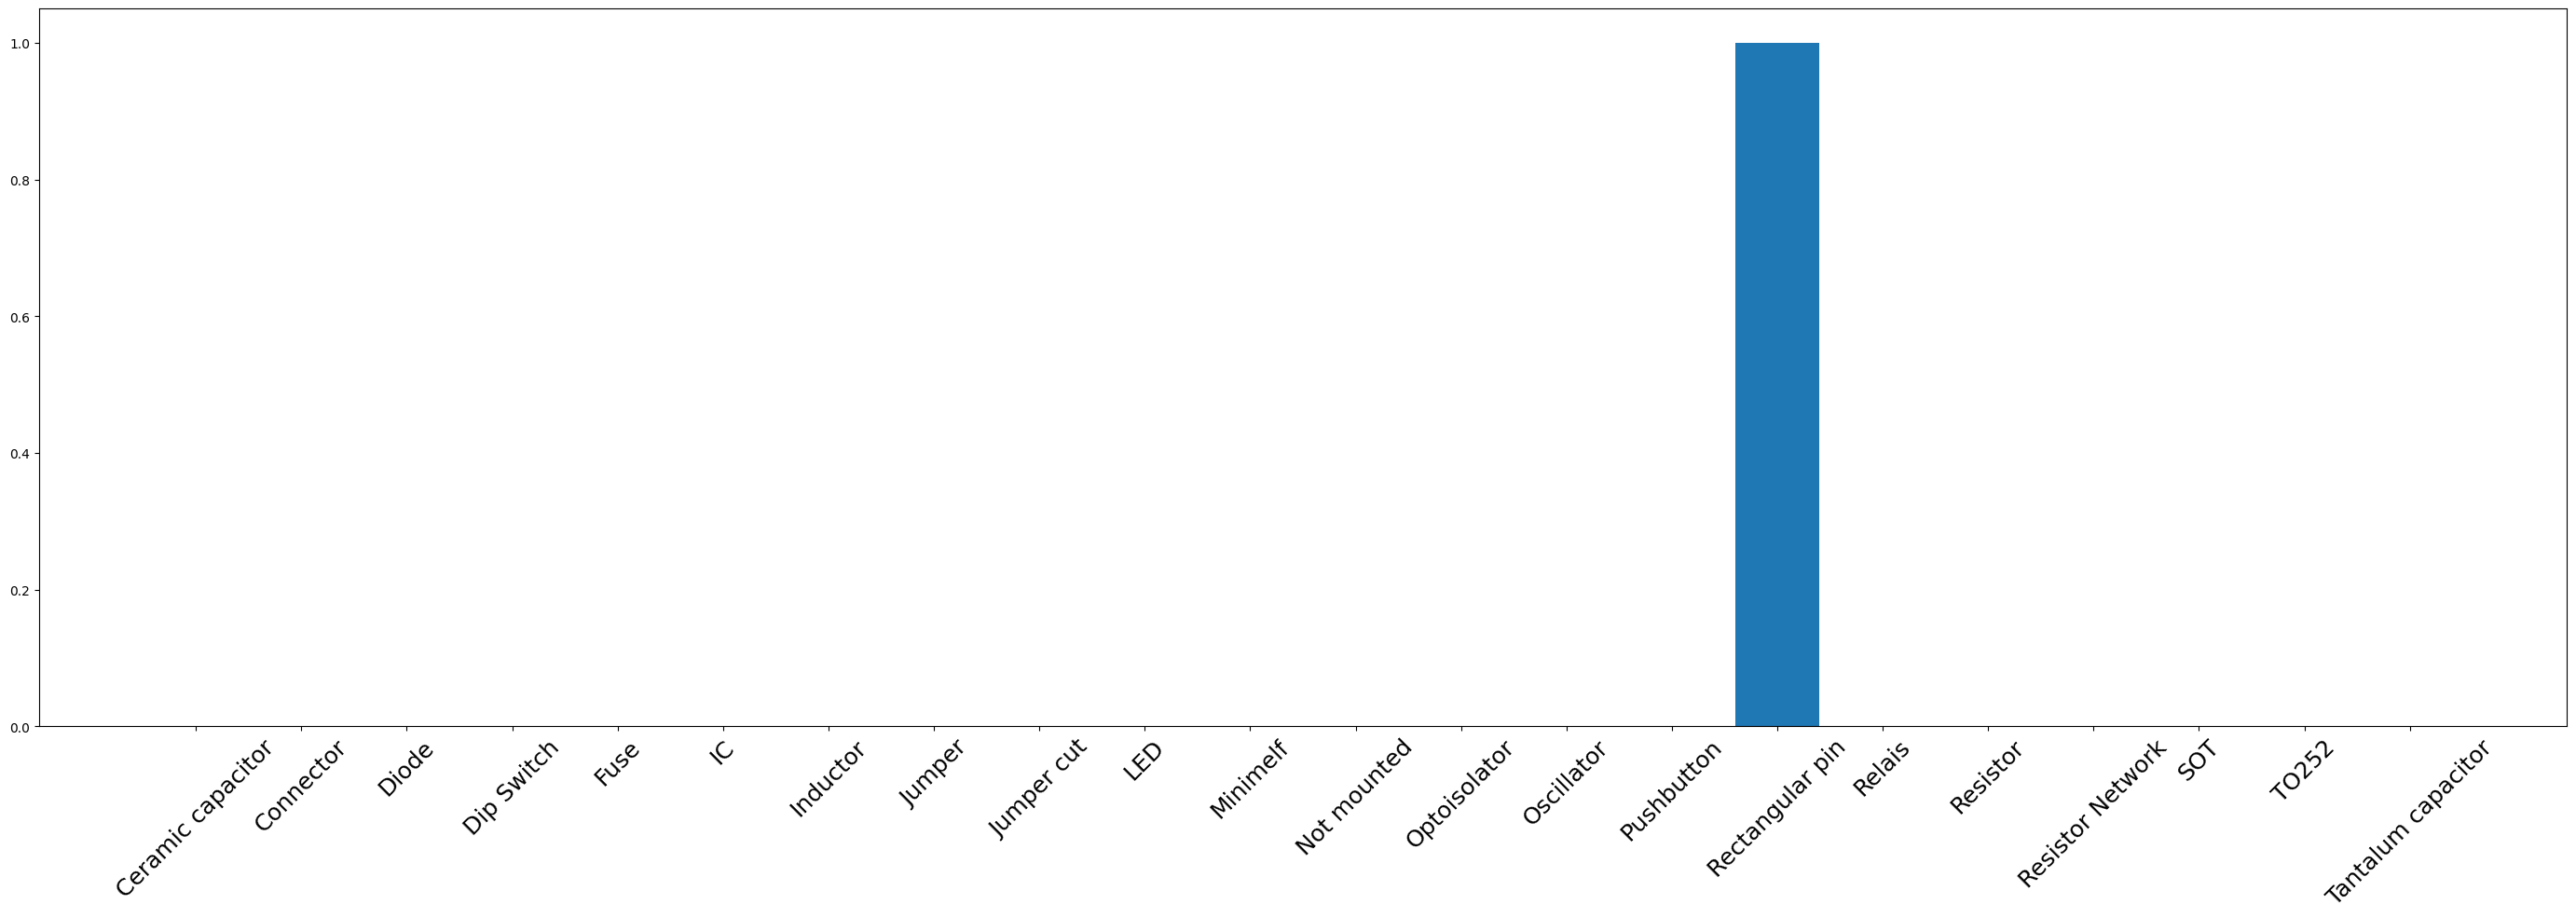

1/1 [==============================] - 0s 22ms/step
Predicted label: LED
Real label: LED


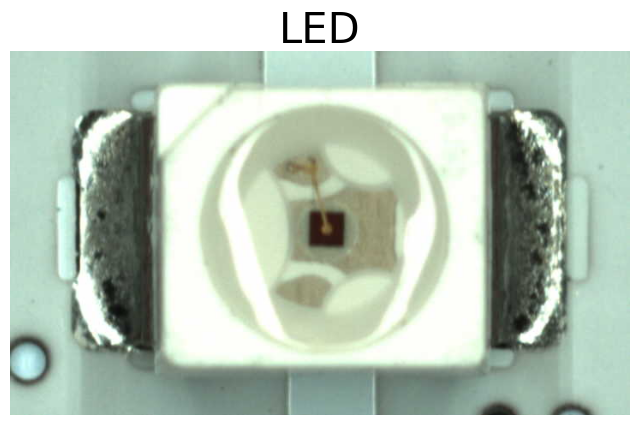

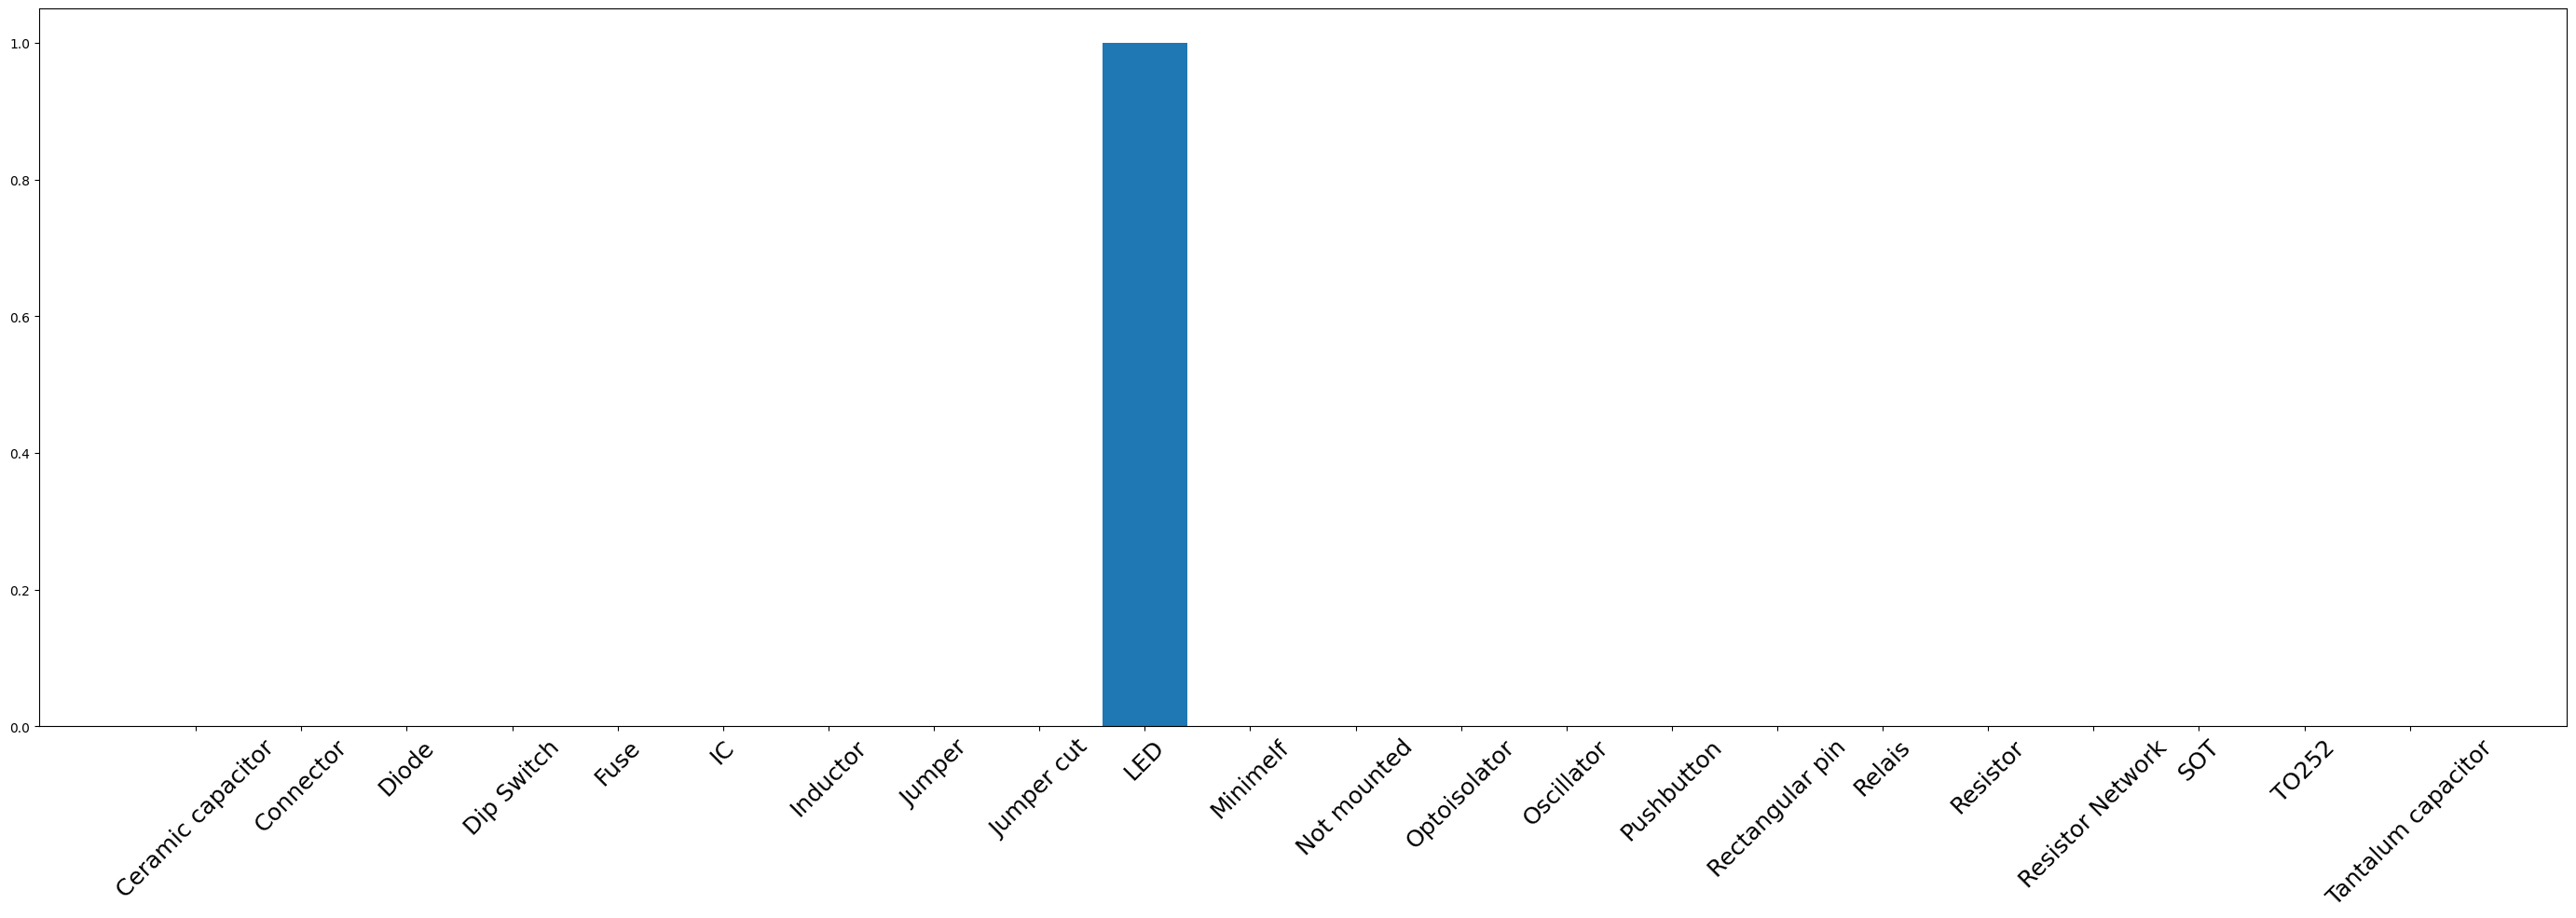

1/1 [==============================] - 0s 30ms/step
Predicted label: Not mounted
Real label: Not mounted


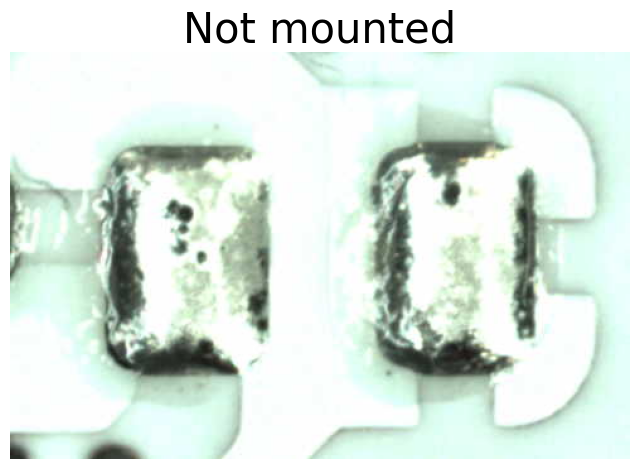

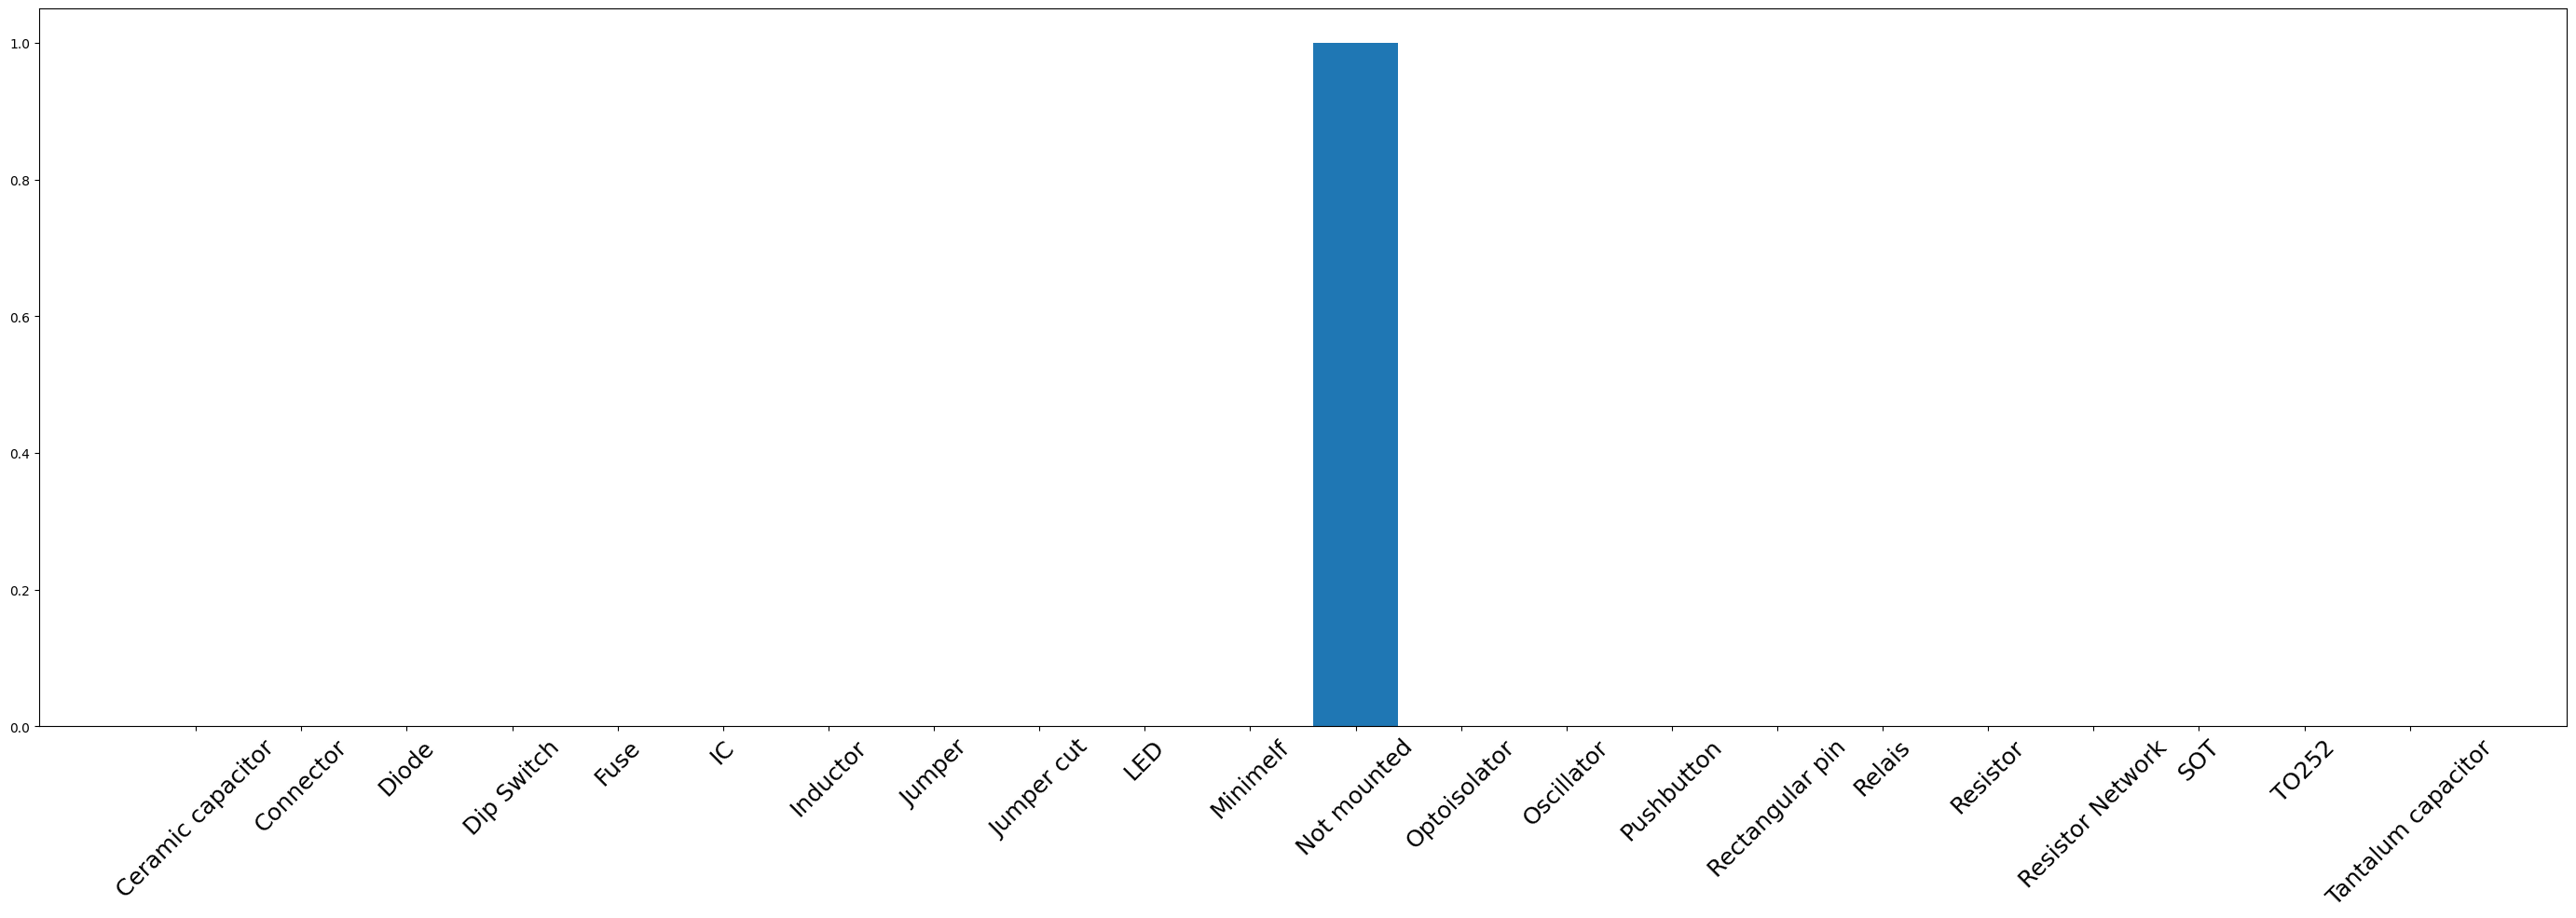

1/1 [==============================] - 0s 26ms/step
Predicted label: Rectangular pin
Real label: Rectangular pin


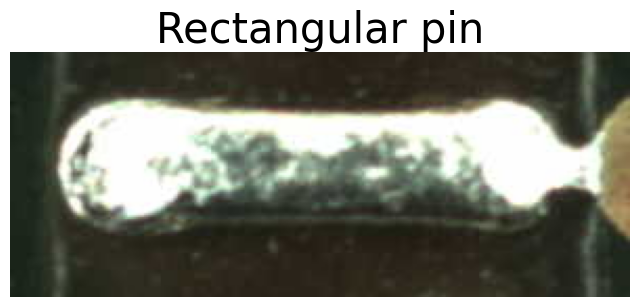

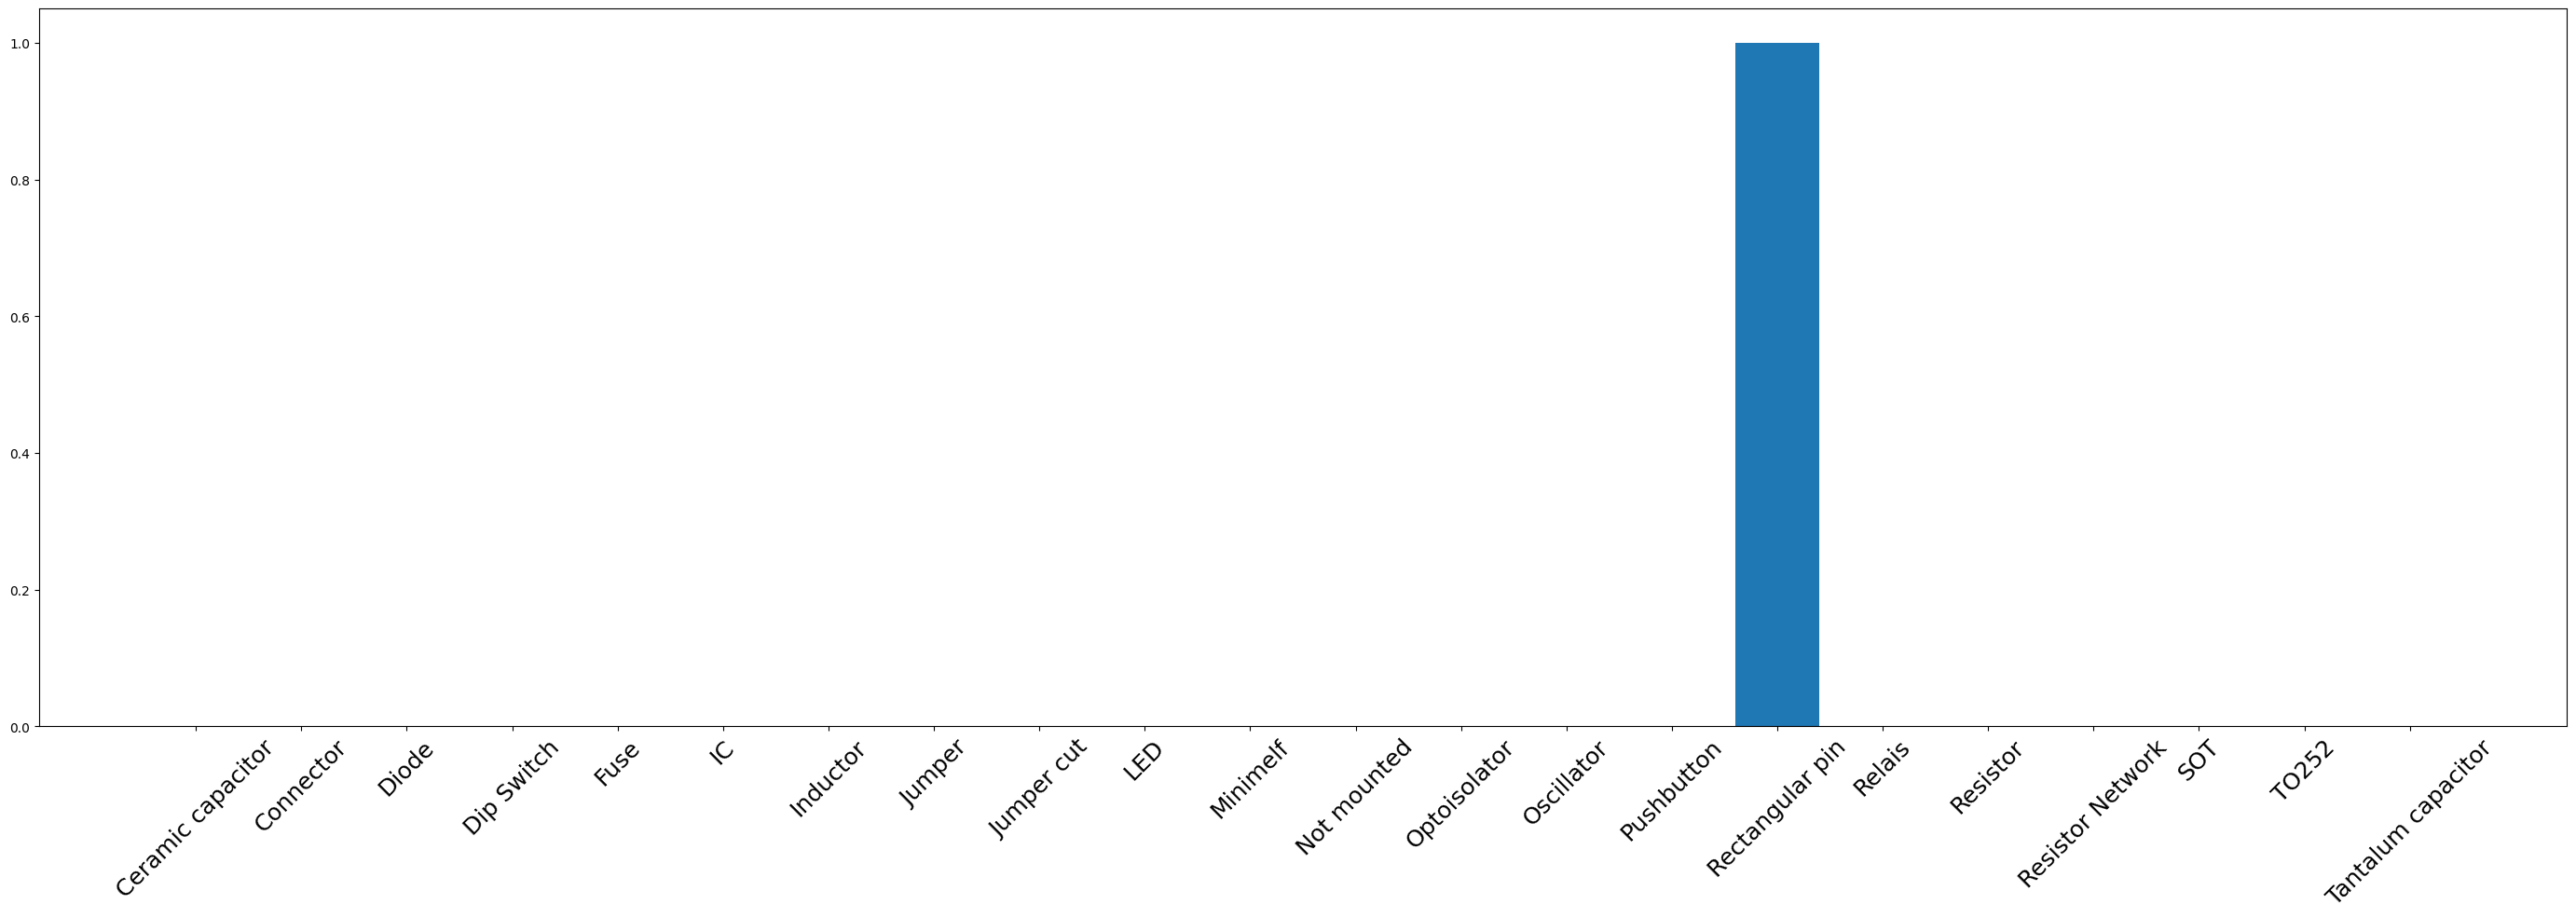

1/1 [==============================] - 0s 23ms/step
Predicted label: Resistor
Real label: Resistor


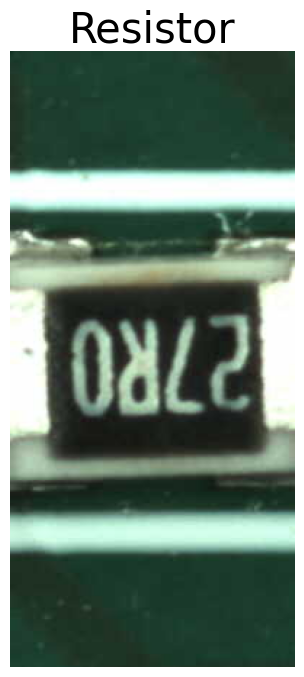

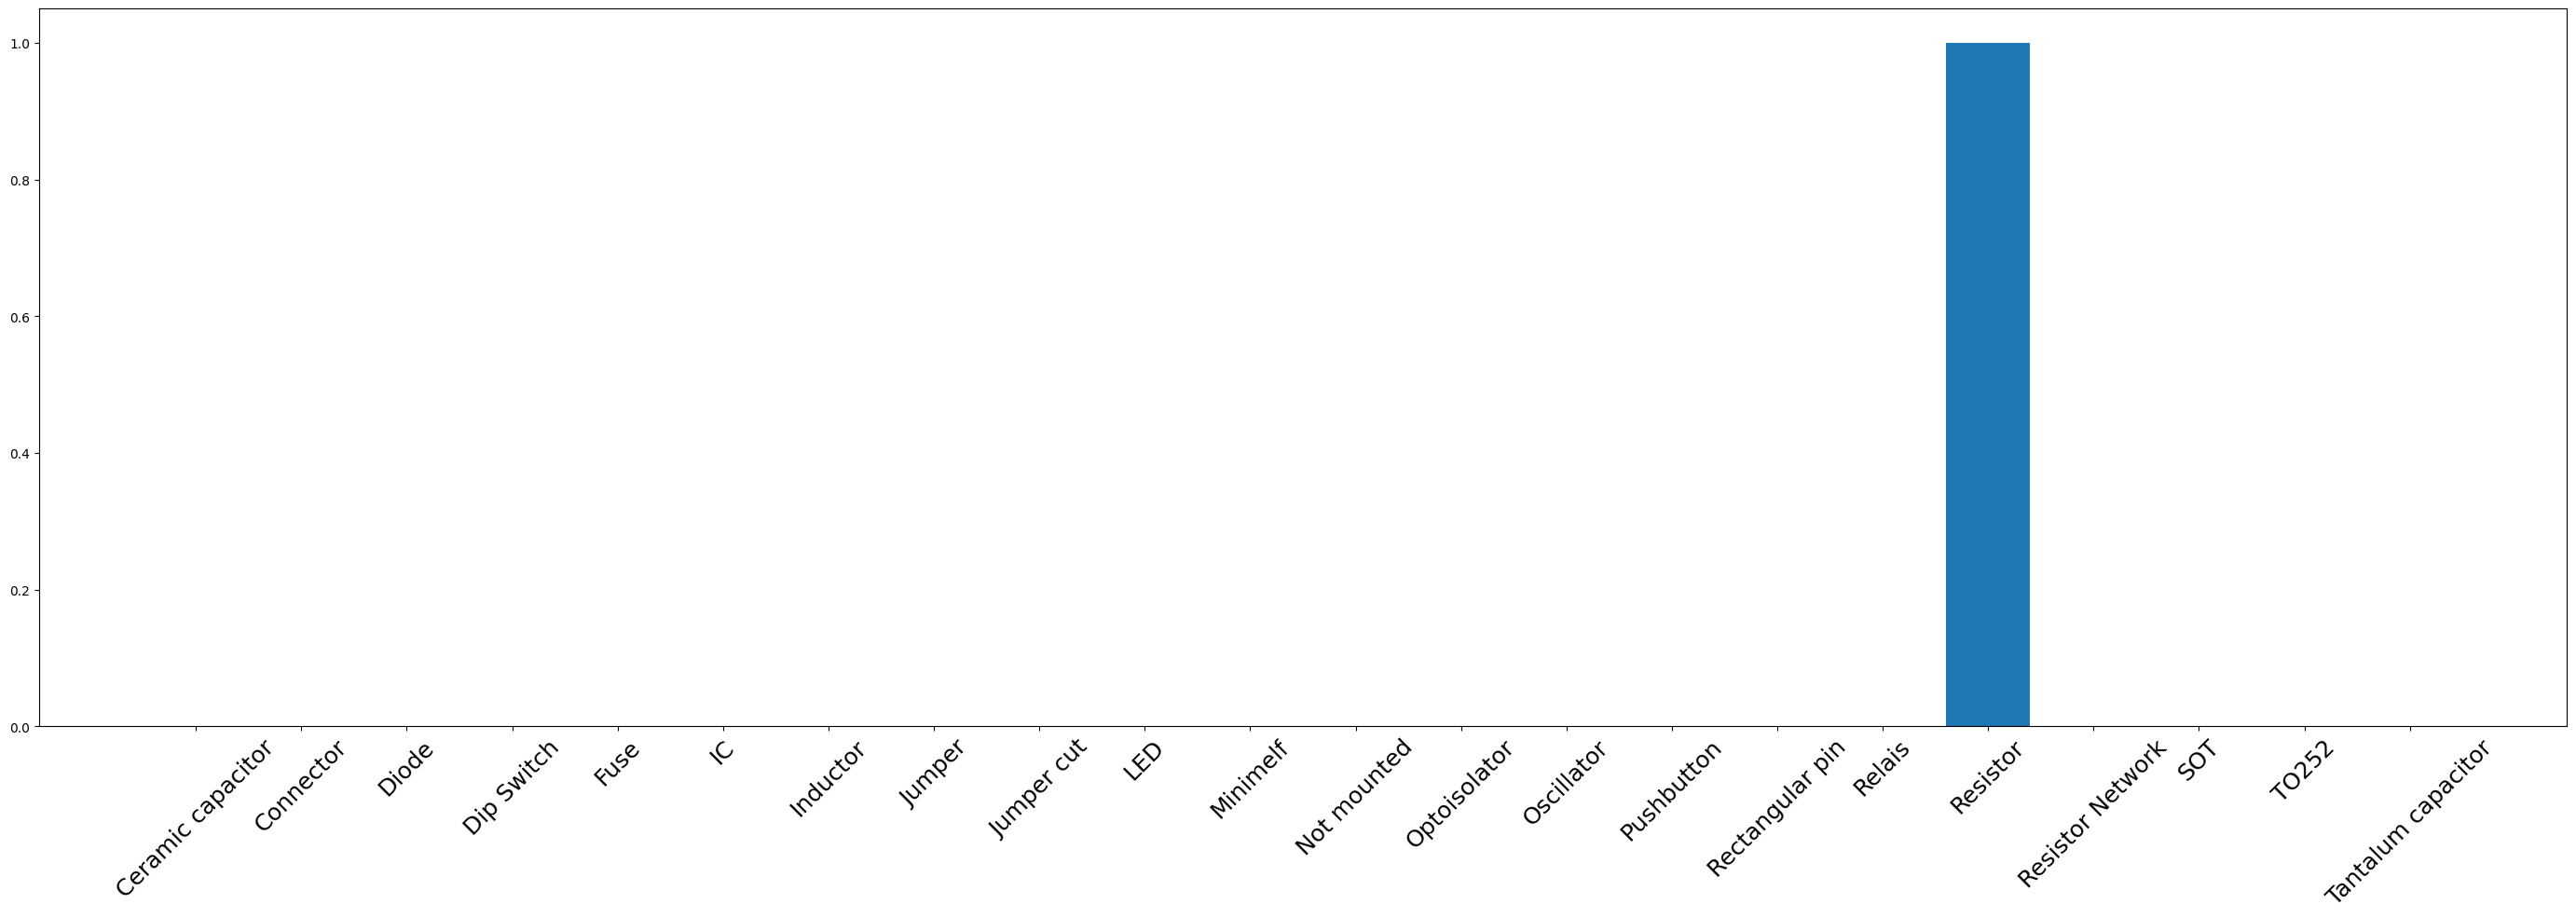

1/1 [==============================] - 0s 30ms/step
Predicted label: Not mounted
Real label: Not mounted


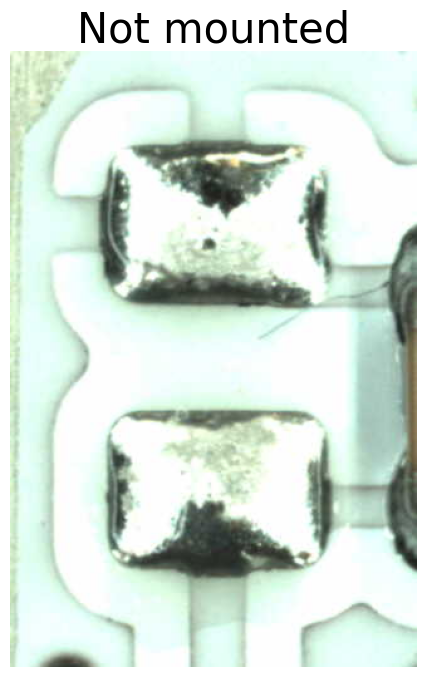

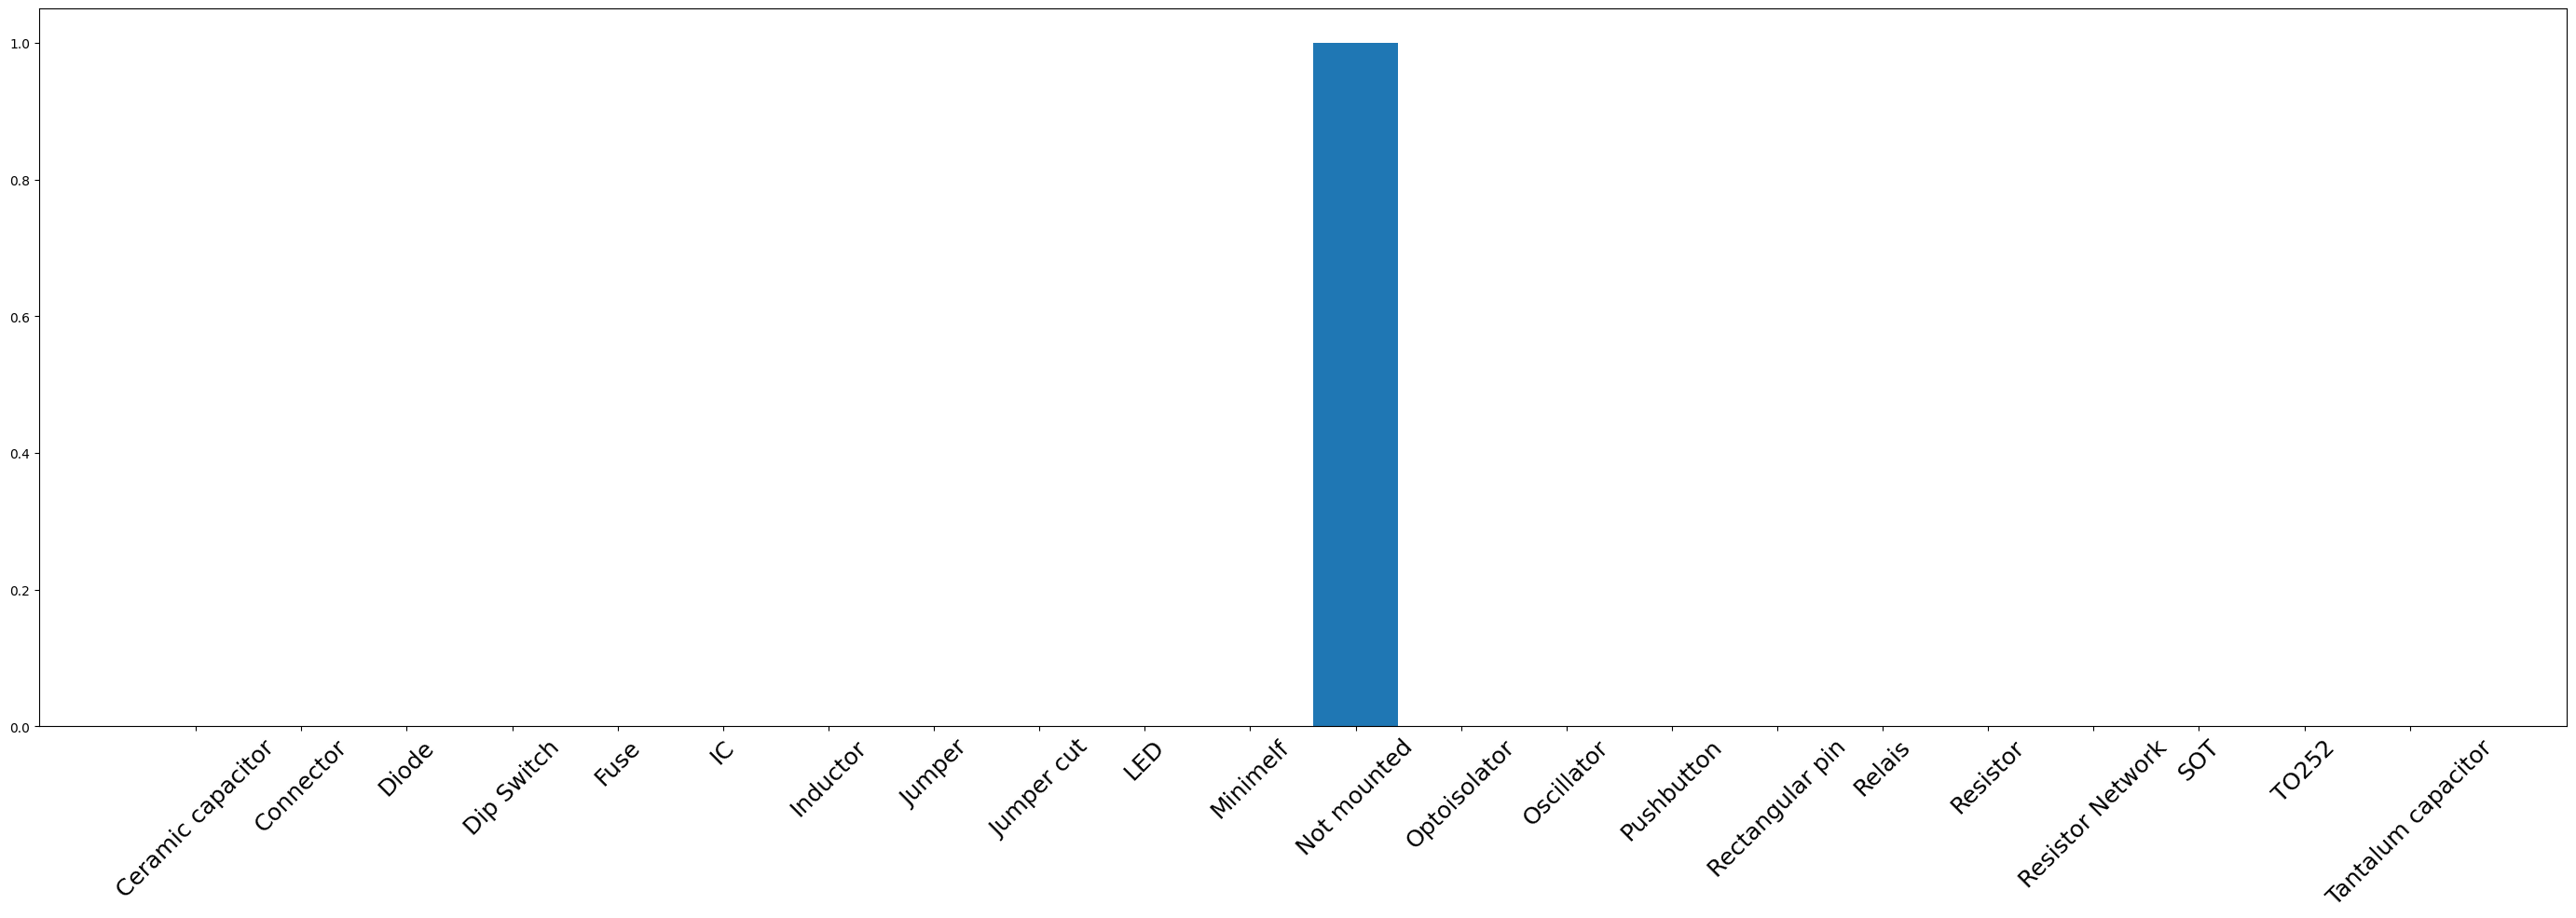

1/1 [==============================] - 0s 24ms/step
Predicted label: Resistor
Real label: Resistor


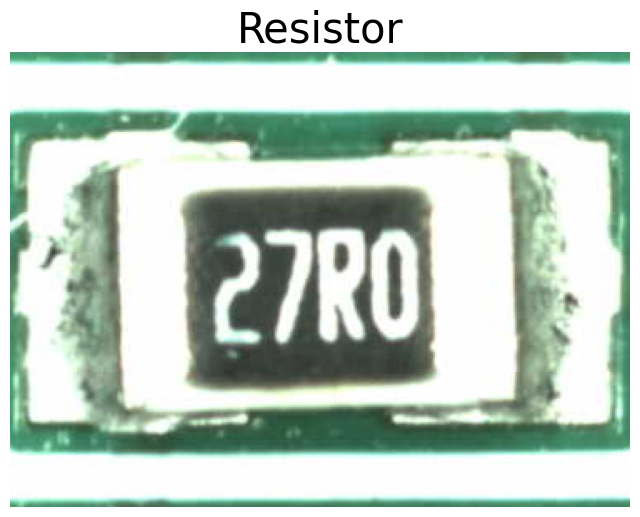

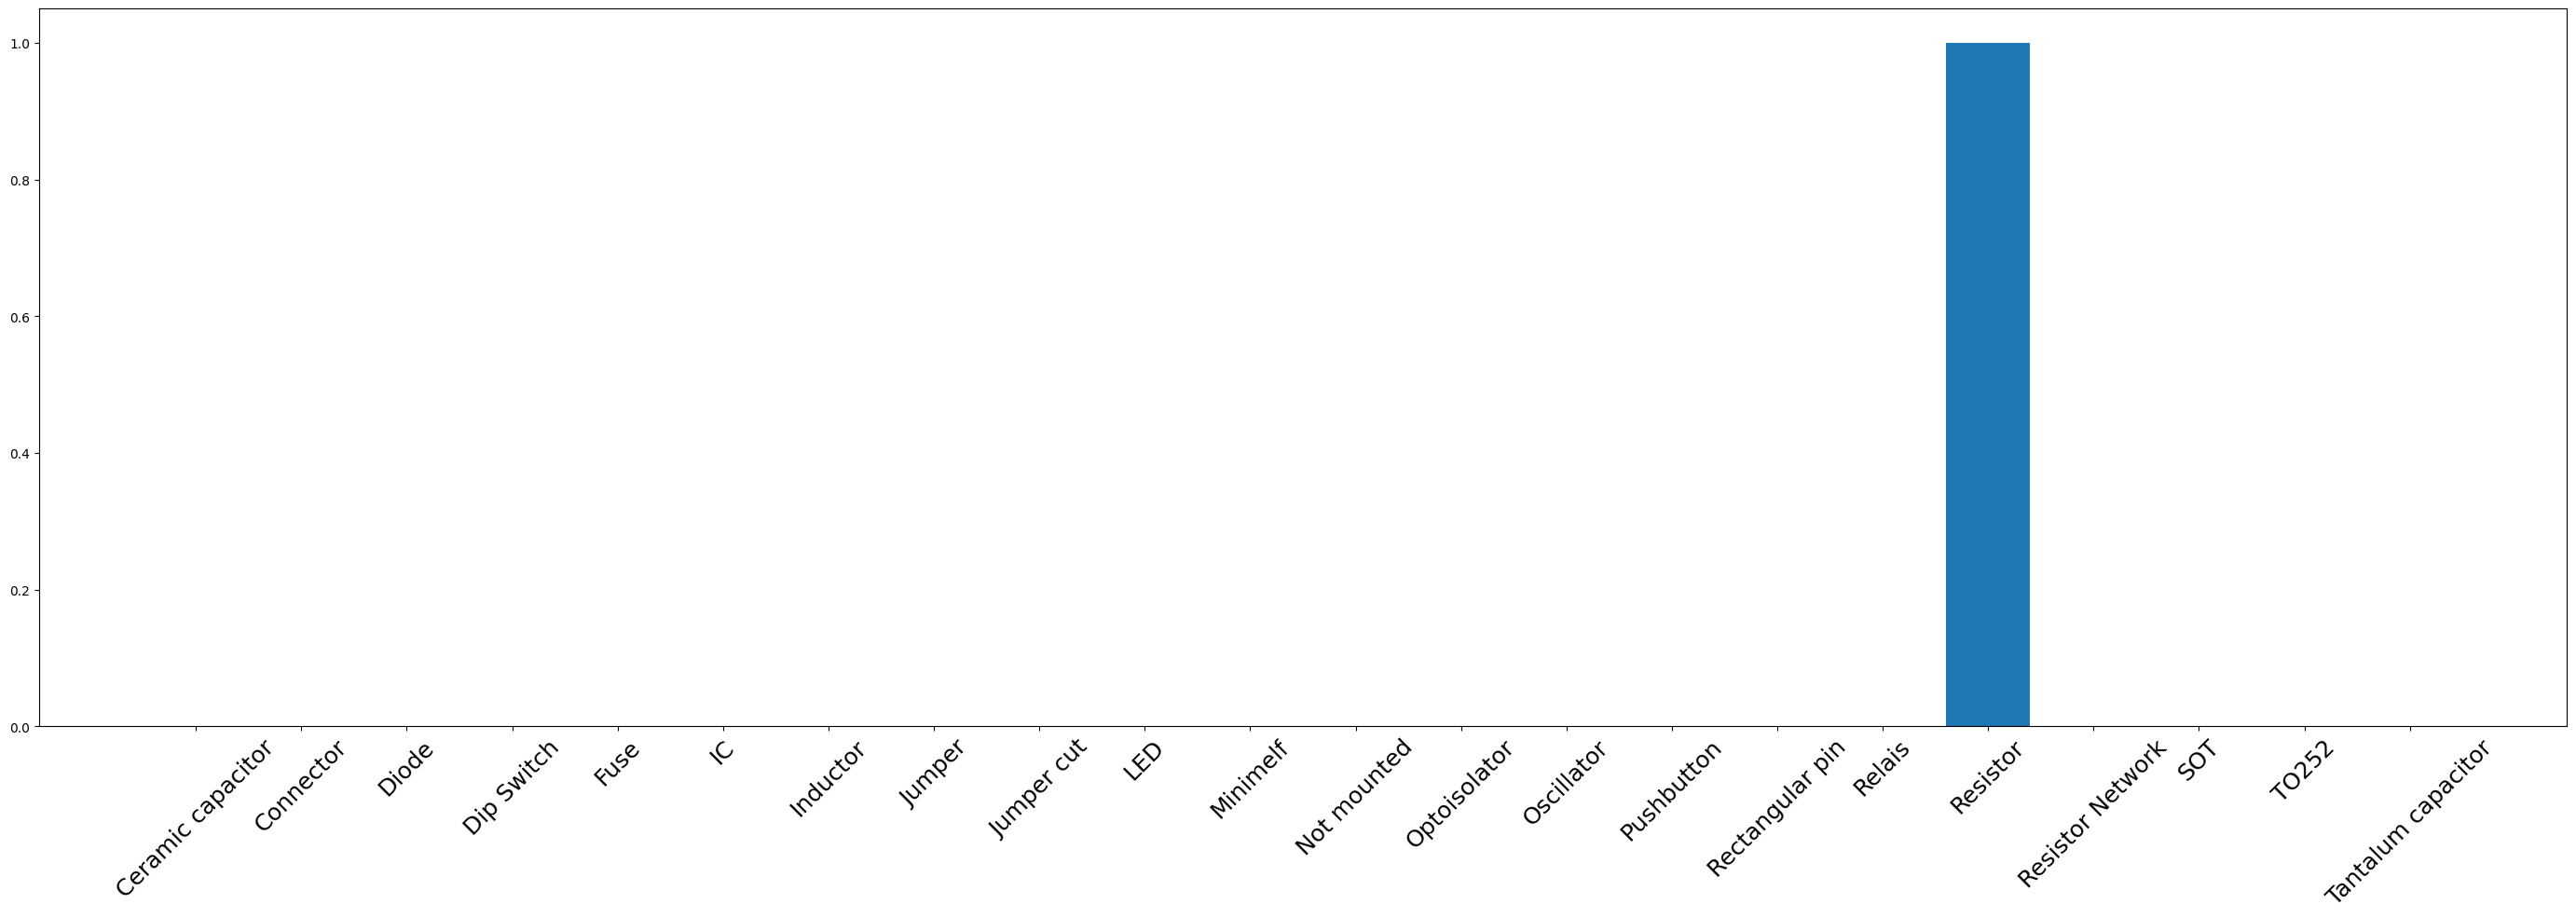

1/1 [==============================] - 0s 23ms/step
Predicted label: SOT
Real label: SOT


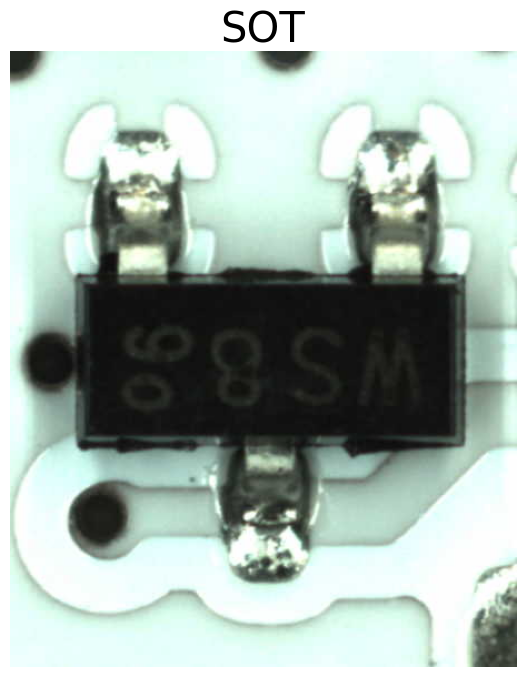

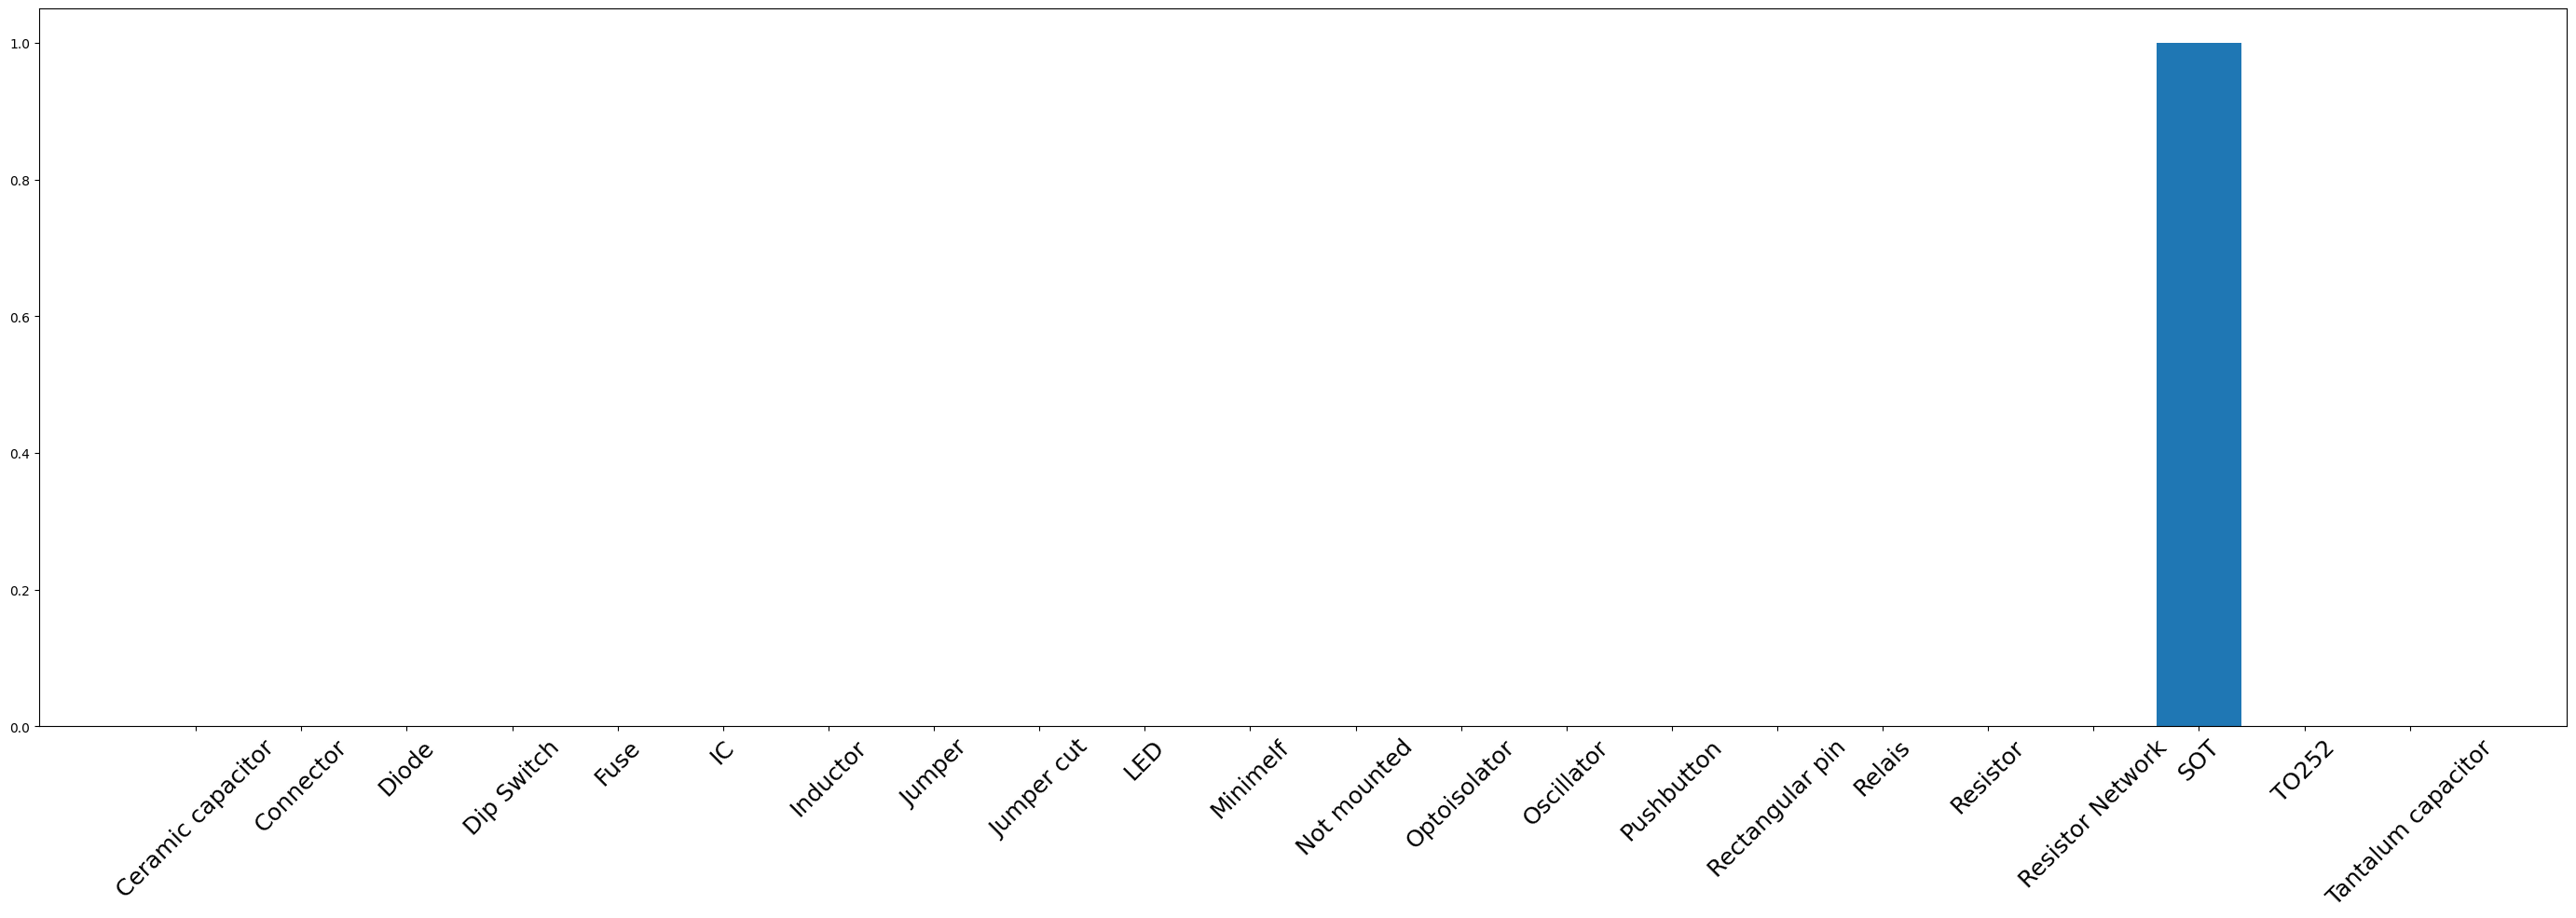




Score: 16 / 16 (100.0%)


In [27]:
import numpy as np
good = 0
extr = list(iter(validset))[np.random.randint(0, len(validset))]
img, lab = extr
for i in range(len(lab)):
    im = tf.expand_dims(img['data'][i], axis=0)
    printable_object = dataset.print_item(img['print_object'][i])
    pred = model.predict(im)
    pred_lidx = tf.argmax(pred[0])
    pred_label = class_names[pred_lidx]
    print("Predicted label: {}".format(pred_label))
    act_lidx = tf.argmax(lab[i])
    act_label = class_names[act_lidx]
    print("Real label: {}".format(act_label))
    print()
    if pred_lidx == act_lidx:
        good += 1
    plt.figure(figsize=(8, 8))
    label = pred_label
    plt.title(label, fontsize=30)
    plt.axis("off")
    plt.imshow(printable_object)
    plt.show()
    plt.figure(figsize=(35, 10))
    plt.bar(range(len(class_names)), pred[0], tick_label=class_names)
    plt.xticks(rotation=45, fontsize=18)
    plt.show()
print("\n\n")
print("Score:", good, "/", len(lab), f"({(good/len(lab))*100}%)")